# Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
import re
import random
import json
import functools
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
import geopandas as gpd
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_rel, wilcoxon
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_rel, wilcoxon

# Data Loading

In [2]:
# many graph algorithms depends on random inicialization
def  setRandom():
    random.seed(42)
    np.random.seed(42)

setRandom()

In [3]:
#Manual configuration of the capital of eurovision affiliated countries

latLongFixed = pd.DataFrame.from_records(
[{'countryfrom': 'Albania', 'Capital': 'Tirane', 'Latitude': 41.3310413, 'Longitude': 19.7828036},
 {'countryfrom': 'Andorra', 'Capital': 'Andorra la Vella', 'Latitude': 42.5051006, 'Longitude': 1.5116108},
 {'countryfrom': 'Armenia', 'Capital': 'Yerevan', 'Latitude': 40.1535684, 'Longitude': 44.3484804},
 #{'countryfrom': 'Australia', 'Capital': 'Canberra', 'Latitude': -35.15, 'Longitude': 149.08},
 {'countryfrom': 'Australia', 'Capital': 'Canberra', 'Latitude': 36, 'Longitude': -19}, #fake location to make the graph looks pretier than the real location
 {'countryfrom': 'Austria',   'Capital': 'Vienna', 'Latitude': 48.2208286, 'Longitude': 16.2399746},
 {'countryfrom': 'Azerbaijan', 'Capital': 'Baku', 'Latitude': 40.3947695, 'Longitude': 49.714873},
 {'countryfrom': 'Belarus', 'Capital': 'Minsk', 'Latitude': 53.8847608, 'Longitude': 27.4532841},
 {'countryfrom': 'Belgium', 'Capital': 'Brussels', 'Latitude': 50.8550625, 'Longitude': 4.3053498},
 {'countryfrom': 'Bosnia', 'Capital': 'Sarajevo', 'Latitude': 43.8938852, 'Longitude': 18.2429054},
 {'countryfrom': 'Bulgaria', 'Capital': 'Sofia', 'Latitude': 42.6955992, 'Longitude': 23.1838604},
 {'countryfrom': 'Croatia', 'Capital': 'Zagreb', 'Latitude': 45.8403496, 'Longitude': 15.8242458},
 {'countryfrom': 'Cyprus', 'Capital': 'Nicosia', 'Latitude': 35.1923727, 'Longitude': 33.3273614},
 {'countryfrom': 'Czech Republic', 'Capital': 'Prague', 'Latitude': 50.0598058, 'Longitude': 14.3255389},
 {'countryfrom': 'Denmark', 'Capital': 'Copenhagen', 'Latitude': 55.6713442, 'Longitude': 12.523784},
 {'countryfrom': 'Estonia', 'Capital': 'Tallinn', 'Latitude': 59.4717421, 'Longitude': 24.4580607},
 {'countryfrom': 'Finland', 'Capital': 'Helsinki', 'Latitude': 60.11021, 'Longitude': 24.7385001},
 {'countryfrom': 'France', 'Capital': 'Paris', 'Latitude': 48.8589507, 'Longitude': 2.2770197},
 {'countryfrom': 'Georgia', 'Capital': "T'bilisi", 'Latitude': 41.7326304, 'Longitude': 44.6987664},
 {'countryfrom': 'Germany', 'Capital': 'Berlin', 'Latitude': 52.5069312, 'Longitude': 13.1445453},
 {'countryfrom': 'Greece', 'Capital': 'Athens', 'Latitude': 37.9909517, 'Longitude': 23.6682987},
 {'countryfrom': 'Hungary', 'Capital': 'Budapest', 'Latitude': 47.4813602, 'Longitude': 19.9902175},
 {'countryfrom': 'Iceland', 'Capital': 'Reykjavik', 'Latitude': 64.1335484, 'Longitude': -21.9224819},
 {'countryfrom': 'Ireland', 'Capital': 'Dublin', 'Latitude': 53.3244431, 'Longitude': -6.3857885},
 {'countryfrom': 'Israel', 'Capital': 'Jerusalem', 'Latitude': 31.7965337, 'Longitude': 35.0352712},
 {'countryfrom': 'Italy', 'Capital': 'Rome', 'Latitude': 41.9102415, 'Longitude': 12.3959115},
 {'countryfrom': 'Latvia', 'Capital': 'Riga', 'Latitude': 56.9715357, 'Longitude': 24.8489796},
 {'countryfrom': 'Lithuania', 'Capital': 'Vilnius', 'Latitude': 54.7007582, 'Longitude': 25.972849},
 {'countryfrom': 'Luxembourg', 'Capital': 'Luxembourg', 'Latitude': 49.6076951, 'Longitude': 6.0658298},
 {'countryfrom': 'Macedonia', 'Capital': 'Skopje', 'Latitude': 41.9991965, 'Longitude': 21.3548497},
 {'countryfrom': 'Malta',     'Capital': 'Valletta', 'Latitude': 35.8984976, 'Longitude': 14.5044102},
 {'countryfrom': 'Moldova', 'Capital': 'Chisinau', 'Latitude': 47.0000178, 'Longitude': 28.718091},
 {'countryfrom': 'Monaco',  'Capital': 'Monte Carlo', 'Latitude': 43.7410682, 'Longitude': 7.4172157},
 
 {'countryfrom': 'Montenegro', 'Capital': 'Montenegro', 'Latitude': 42.708679, 'Longitude': 19.37439},
 {'countryfrom': 'Morocco', 'Capital': 'Rabbat', 'Latitude': 31.791702, 'Longitude': -7.09262},
 {'countryfrom': 'Netherlands', 'Capital': 'Amsterdam', 'Latitude': 52.3547925, 'Longitude': 4.7638758},
 {'countryfrom': 'Norway',   'Capital': 'Oslo', 'Latitude': 59.8937803, 'Longitude': 10.6446921},
 {'countryfrom': 'Poland',   'Capital': 'Warsaw', 'Latitude': 52.2328546, 'Longitude': 20.9207684},
 {'countryfrom': 'Portugal', 'Capital': 'Lisbon', 'Latitude': 38.7436056, 'Longitude': -9.2304149},
 {'countryfrom': 'Romania',  'Capital': 'Bucuresti', 'Latitude': 44.4377397, 'Longitude': 25.9542107},
 {'countryfrom': 'Russia',   'Capital': 'Moskva', 'Latitude': 55.5807418, 'Longitude': 37.8237562},
 {'countryfrom': 'San Marino', 'Capital': 'San Marino', 'Latitude': 43.9428565, 'Longitude': 12.3898818},
 {'countryfrom': 'Serbia', 'Capital': 'Belgrade', 'Latitude': 44.8151593, 'Longitude': 20.2821702},
 {'countryfrom': 'Slovakia', 'Capital': 'Bratislava', 'Latitude': 48.1356948, 'Longitude': 16.9754907,},
 {'countryfrom': 'Slovenia', 'Capital': 'Ljubljana', 'Latitude': 46.0660959, 'Longitude': 14.4618877},
 {'countryfrom': 'Spain', 'Capital': 'Madrid', 'Latitude': 40.4378693, 'Longitude': -3.8199641,},
 {'countryfrom': 'Sweden', 'Capital': 'Stockholm', 'Latitude': 59.3260664, 'Longitude': 17.841628},
 {'countryfrom': 'Switzerland', 'Capital': 'Bern', 'Latitude': 46.9546485, 'Longitude': 7.3246587},
 {'countryfrom': 'Turkey', 'Capital': 'Ankara', 'Latitude': 39.9032919, 'Longitude': 32.6223372},
 {'countryfrom': 'Ukraine', 'Capital': 'Kiev', 'Latitude': 50.4016974, 'Longitude': 30.251825},
 {'countryfrom': 'United Kingdom', 'Capital': 'London', 'Latitude': 51.5285578, 'Longitude': -0.05}]
)

In [4]:
#countries  participants of eurovision and their neighbours. 
countriesCodes =['AE','AU','SA','SY','BE', 'EL','GR', 'LT', 'PT', 'BG', 'ES', 'LU', 'RO','GB','KZ','TM',
                 'CZ', 'FR', 'HU', 'SI', 'DK', 'HR', 'MT', 'SK', 'DE', 'IT', 'NL', 'FI','IQ',
                 'EE', 'CY', 'AT', 'SE', 'IE', 'LV', 'PL', 'UK', 'IS', 'NO', 'LI', 'CH','KW','OM',
                 'ME', 'MK', 'AL', 'RS', 'TR', 'BA', 'XK', 'AM', 'BY', 'GE', 'AZ', 'MD', 'UA', 'IR',
                 'IL', 'DZ', 'LB', 'SY', 'EG', 'LY', 'TN', 'IL', 'MA', 'RU', 'JO', 'PS','LB','PS','YE','JO','MT']

countriesBorders = json.loads(open('countries.geojson').read())

In [5]:
#moving australia shape from south pacific to north atlantic for visualization purpose
ausCenter = pd.DataFrame(latLongFixed)[['Longitude','Latitude']].min().values+5
for n in countriesBorders['features']:
    if n['properties']['ADMIN']=='Australia':
        geometry = n['geometry'];
        if geometry['type'] == 'MultiPolygon':
            for c in geometry['coordinates']:
                for i in range(len(c)):
                    c[i] = ((np.array(c[i]) + np.array([-150,35]))/2+ausCenter).tolist()

# Data Preprocessing and Data Collection (2016 to 2019)

In [72]:
df = pd.read_excel('eurovision_song_contest_1975_2019.xlsx')
df.columns = ['year','final','edition','votetype','countryfrom','countryto','points','duplicate'];

In [75]:
# Assuming you have a 'Year' column and it's formatted as integers or datetime
# Filter the data between 2016 and 2019
filtered_df = df[(df['year'] >= 2016) & (df['year'] <= 2019)]

# Save the filtered data to a new Excel file
file_path="C:/Users/prajw/Desktop/New folder (2)/filtered_data_2016_2019.xlsx"
df.to_excel(file_path,index=False)

print(f"Filtered data saved to {filtered_file_path}")

Filtered data saved to filtered_data_2016_2019.xlsx


In [7]:
df2 = df[df['year'] == 2016]
df2 = df2.drop(columns = 'duplicate')

In [8]:
#Stantardazing countries names.
def applyRename(x):
    renamings ={
        'North Macedonia':'Macedonia',
        'F.Y.R. Macedonia':'Macedonia',
        'The Netherands': 'Netherlands',
        'The Netherlands':'Netherlands',
        'Bosnia & Herzegovina':'Bosnia',
    }
    return renamings[x] if x in renamings else x

df2['countryfrom'] = df2['countryfrom'].apply(applyRename)
df2['countryto']   = df2['countryto'].apply(applyRename)

In [9]:
#replicating  Yugoslavia's results to countries that part of it.
division = {'Yugoslavia':['Macedonia','Serbia','Montenegro','Slovenia','Bosnia','Croatia'], 'Serbia & Montenegro':['Serbia','Montenegro'] }

df2['countryfrom'] = df2['countryfrom'].apply(lambda x:division[x] if x in division else x)
df2['countryto']   = df2['countryto'].apply(lambda x:division[x] if x in division else x)
df2 = df2.explode('countryfrom').explode('countryto')

In [10]:
#keep only the points received at the highest stage (finals/semifinals)
df2['finalcode']=df2.final.map({'f':1,'sf':2,'sf1':2,'sf2':2})
temp1 = df2.groupby(['countryto','year']).agg({'finalcode':'min'});
df2 = pd.merge(df2,temp1, on=['countryto','year','finalcode'], how='inner')

assert len(df2.groupby(['countryfrom','countryto','year']).agg({'final':'nunique'}).query('final >1')) == 0

df2.drop(columns=['finalcode','edition'], inplace=True)

In [11]:
#The Winner
df2.query('final =="f"')\
    .groupby(['countryto','year']).agg({'points':'sum'}).reset_index()\
    .groupby('year').apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
    .sort_values('year',ascending=False)\
    .head(12).T.style.set_caption("The Winners")

In [12]:
# Assuming df2 is your Eurovision voting data DataFrame with columns 'year', 'countryfrom', 'countryto', 'points', 'votetype'
# Separate the data into jury and televote
df_jury = df2[df2['votetype'] == 'J']
df_televote = df2[df2['votetype'] == 'T']

# Perform Spectral Clustering 2016

In [13]:
def create_adjacency_matrix(df):
    countries = np.union1d(df['countryfrom'].unique(), df['countryto'].unique())
    adj_matrix = pd.DataFrame(0, index=countries, columns=countries)
    for _, row in df.iterrows():
        adj_matrix.at[row['countryfrom'], row['countryto']] += row['points']
    return adj_matrix

# Create adjacency matrices for jury and televote
adj_matrix_jury = create_adjacency_matrix(df_jury)
adj_matrix_televote = create_adjacency_matrix(df_televote)

C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

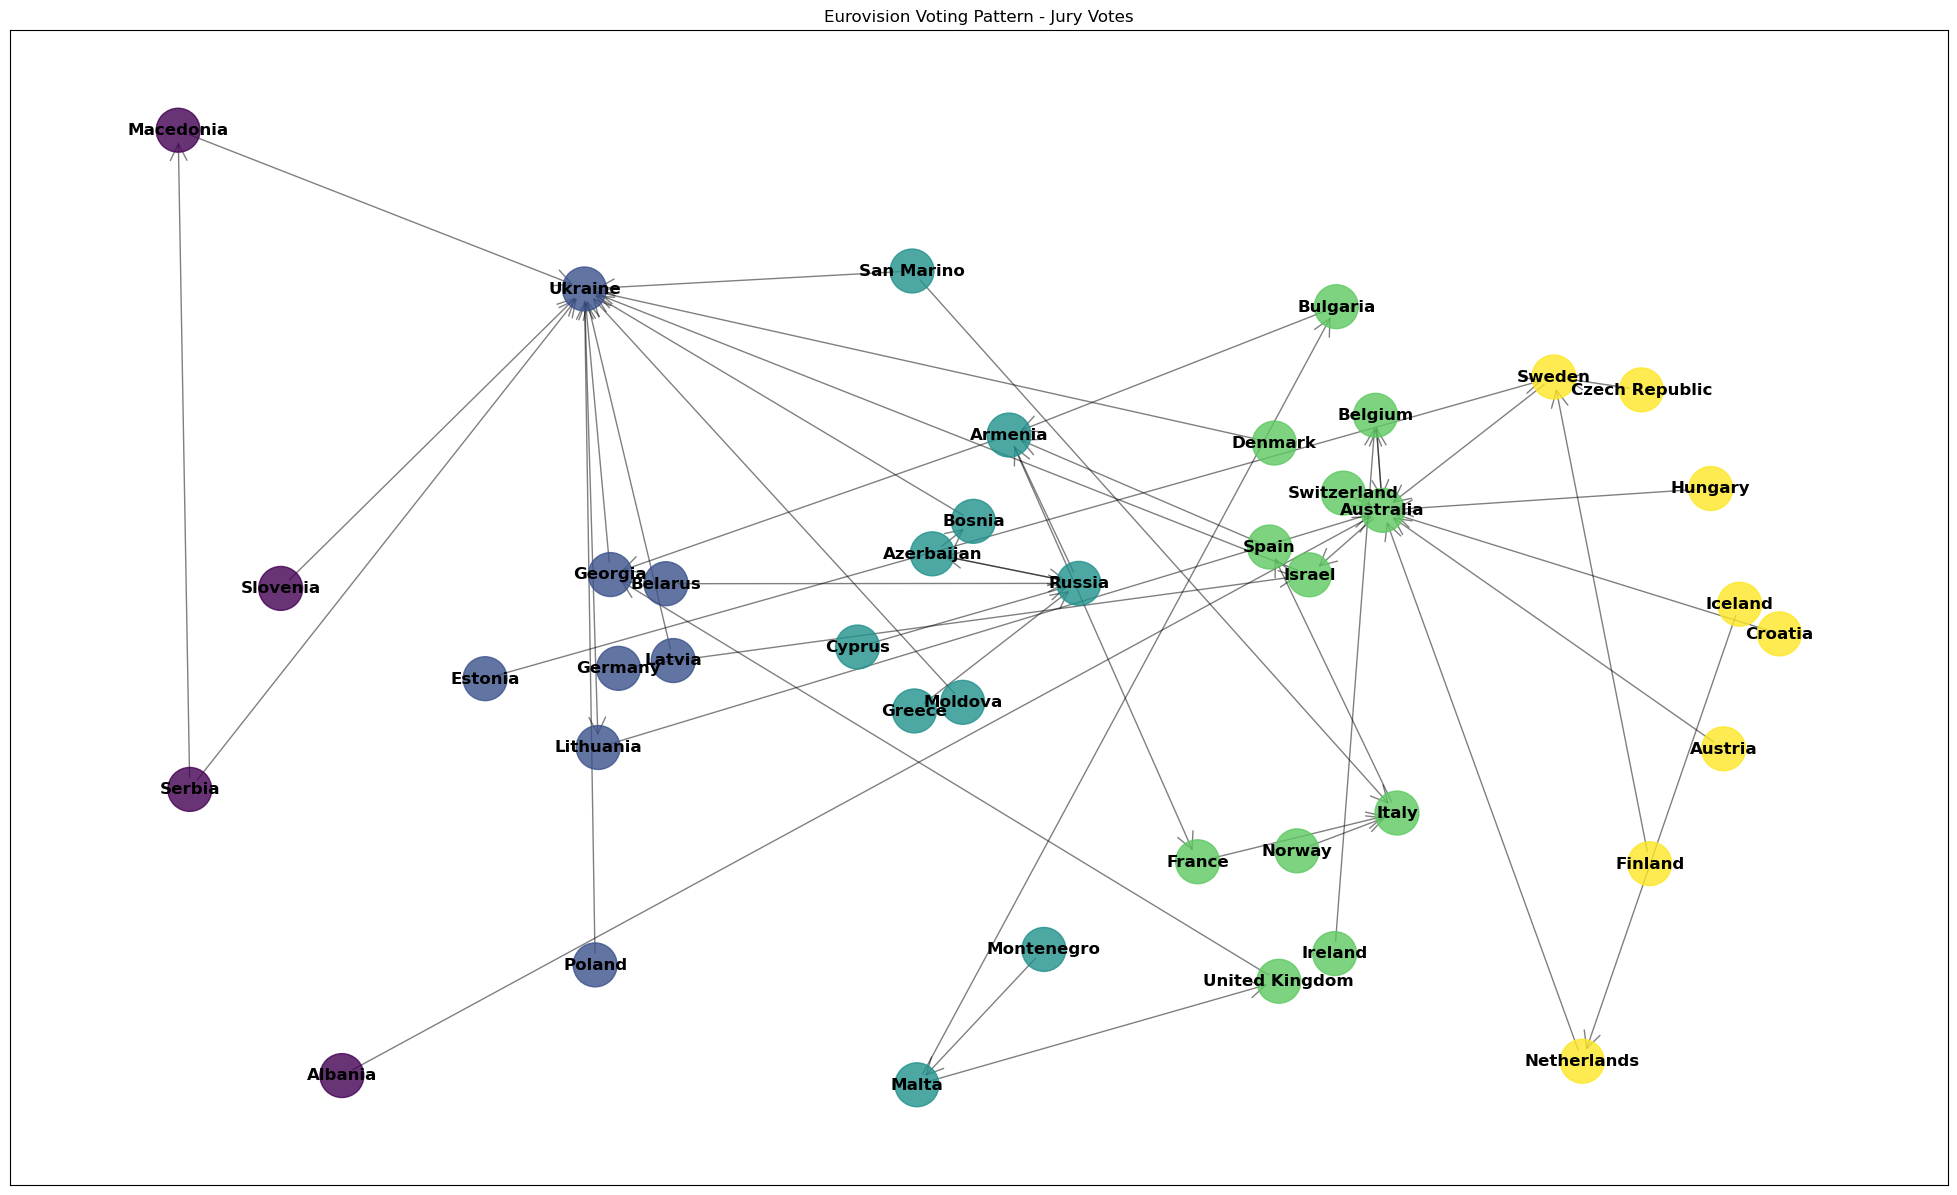

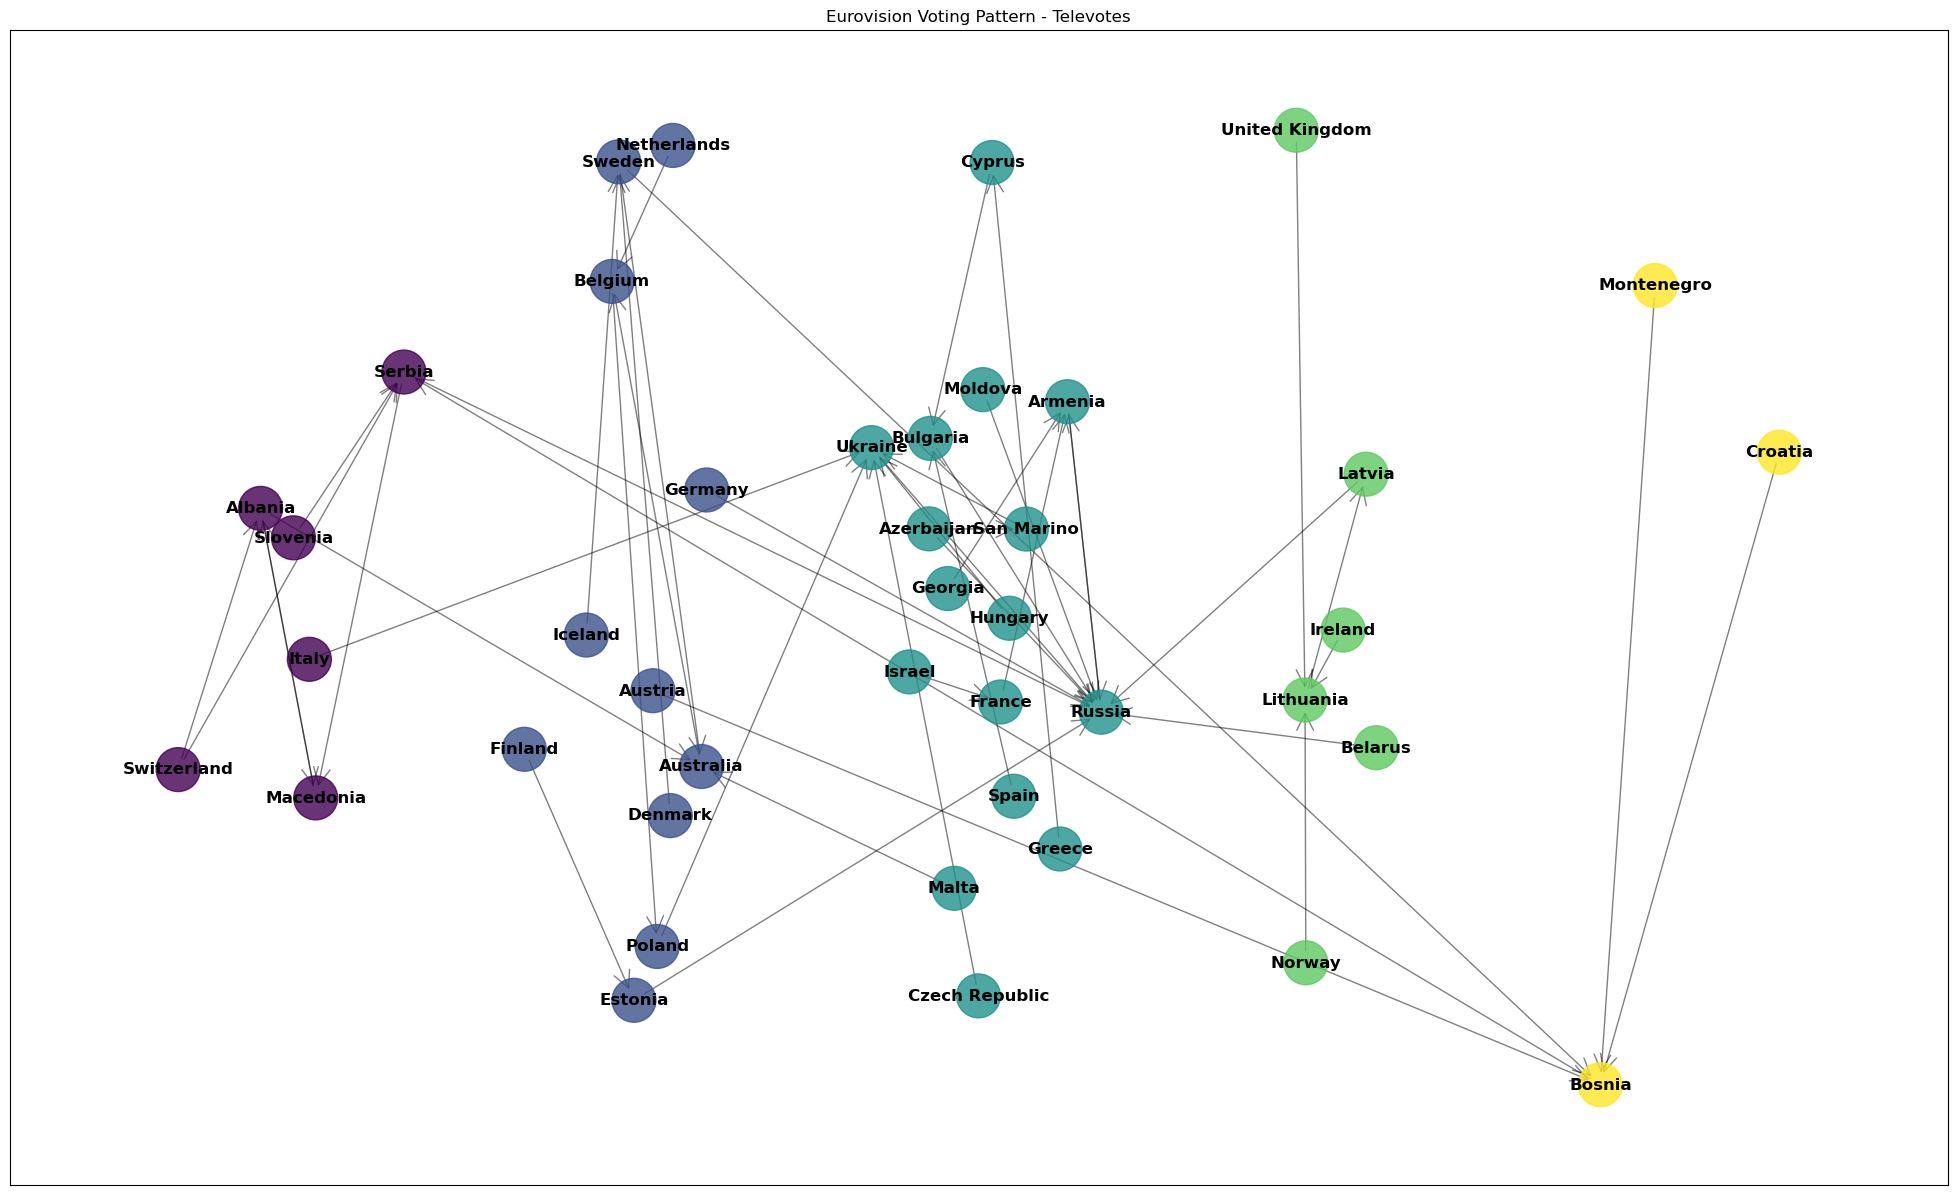

In [14]:
def perform_spectral_clustering(adj_matrix, n_clusters=5):
    sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = sc.fit_predict(adj_matrix)
    return labels

# Perform spectral clustering for jury and televote
labels_jury = perform_spectral_clustering(adj_matrix_jury)
labels_televote = perform_spectral_clustering(adj_matrix_televote)

# Function to select the top percent of edges
def selectTopPercent(df, weight_col, percent=0.3):
    df = df.sort_values(by=weight_col, ascending=False)
    cum_sum = df[weight_col].cumsum()
    total_sum = df[weight_col].sum()
    return df[cum_sum <= total_sum * percent]

# Function to plot directed graph with community labels
def plot_directed_graph(adj_matrix, labels, countries, title, edge_fraction=1.0):
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    unique_labels = list(set(labels))
    cluster_count = len(unique_labels)
    
    # Initialize positions dictionary
    pos = {}
    for i, label in enumerate(unique_labels):
        cluster_nodes = [node for node, cluster in enumerate(labels) if cluster == label]
        cluster_pos = nx.kamada_kawai_layout(G.subgraph(cluster_nodes))
        
        # Offset positions to place clusters side by side
        offset = np.array([i * 3, 0])
        for node in cluster_nodes:
            pos[node] = cluster_pos[node] + offset

    plt.figure(figsize=(25, 15))  # larger figure size for better spacing

    # Prepare edges
    edges_df = nx.to_pandas_edgelist(G)
    edges_df['weight'] = [adj_matrix[u, v] for u, v in zip(edges_df['source'], edges_df['target'])]

    if edge_fraction < 1.0:
        edges_df = edges_df.groupby('source').apply(selectTopPercent, 'weight', edge_fraction).reset_index(drop=True)

    # Draw edges first
    edge_list = list(zip(edges_df['source'], edges_df['target']))
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, arrowstyle='->', arrowsize=30, alpha=0.5)

    # Draw nodes and labels on top of edges
    nx.draw_networkx_nodes(G, pos, node_size=1000, cmap=plt.cm.viridis, node_color=labels, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=dict(enumerate(countries)), font_size=12, font_weight='bold')

    # Title and display
    plt.title(title)
    plt.show()

# Convert adjacency matrices to numpy arrays for spectral clustering
adj_matrix_jury_np = adj_matrix_jury.values
adj_matrix_televote_np = adj_matrix_televote.values

# Plot the graphs
countries = adj_matrix_jury.index.tolist()
plot_directed_graph(adj_matrix_jury_np, labels_jury, countries, 'Eurovision Voting Pattern - Jury Votes', edge_fraction=0.3)
plot_directed_graph(adj_matrix_televote_np, labels_televote, countries, 'Eurovision Voting Pattern - Televotes', edge_fraction=0.3)


# Perform Hierarchical Clustering 2016

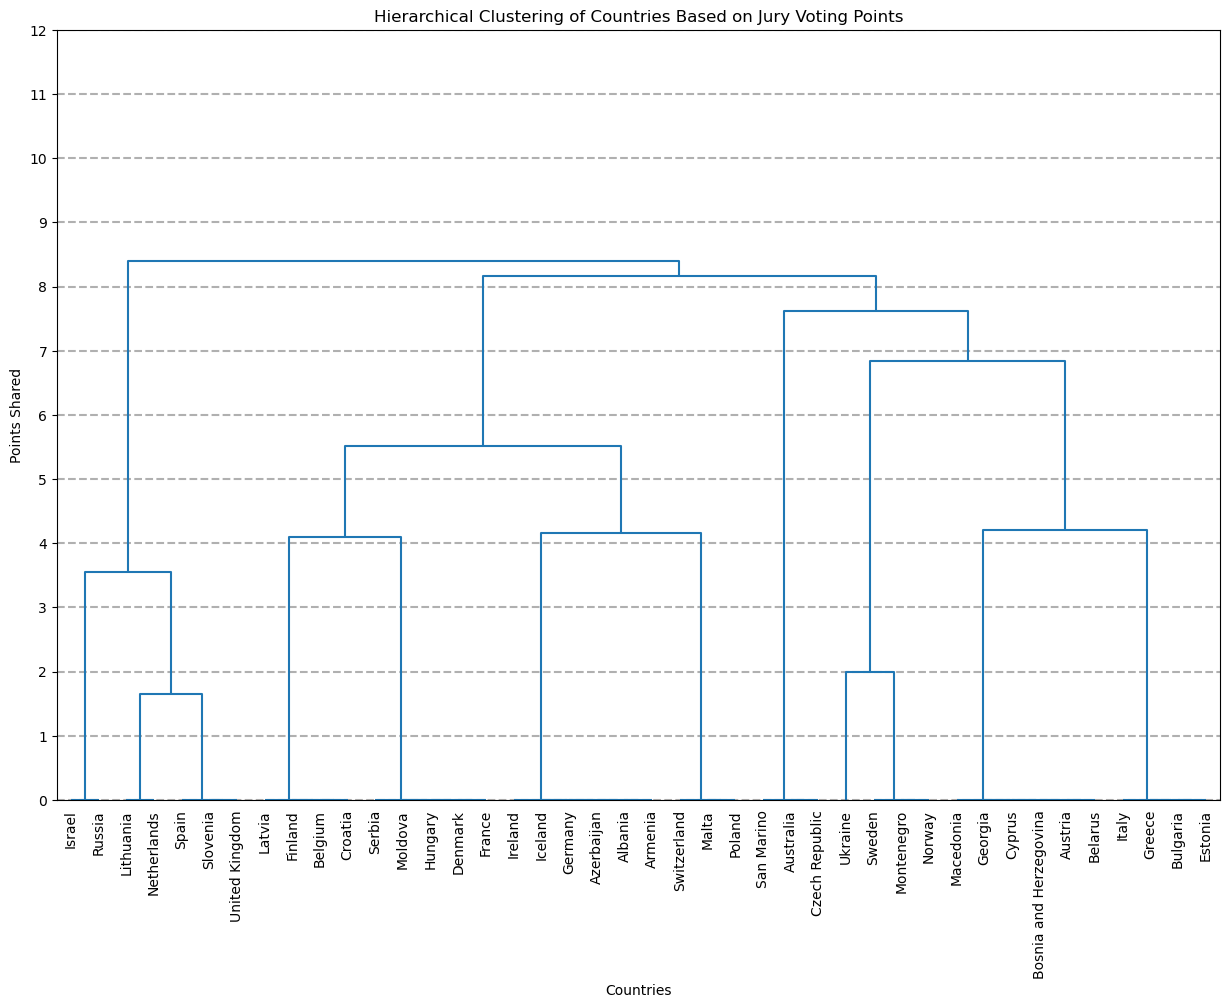

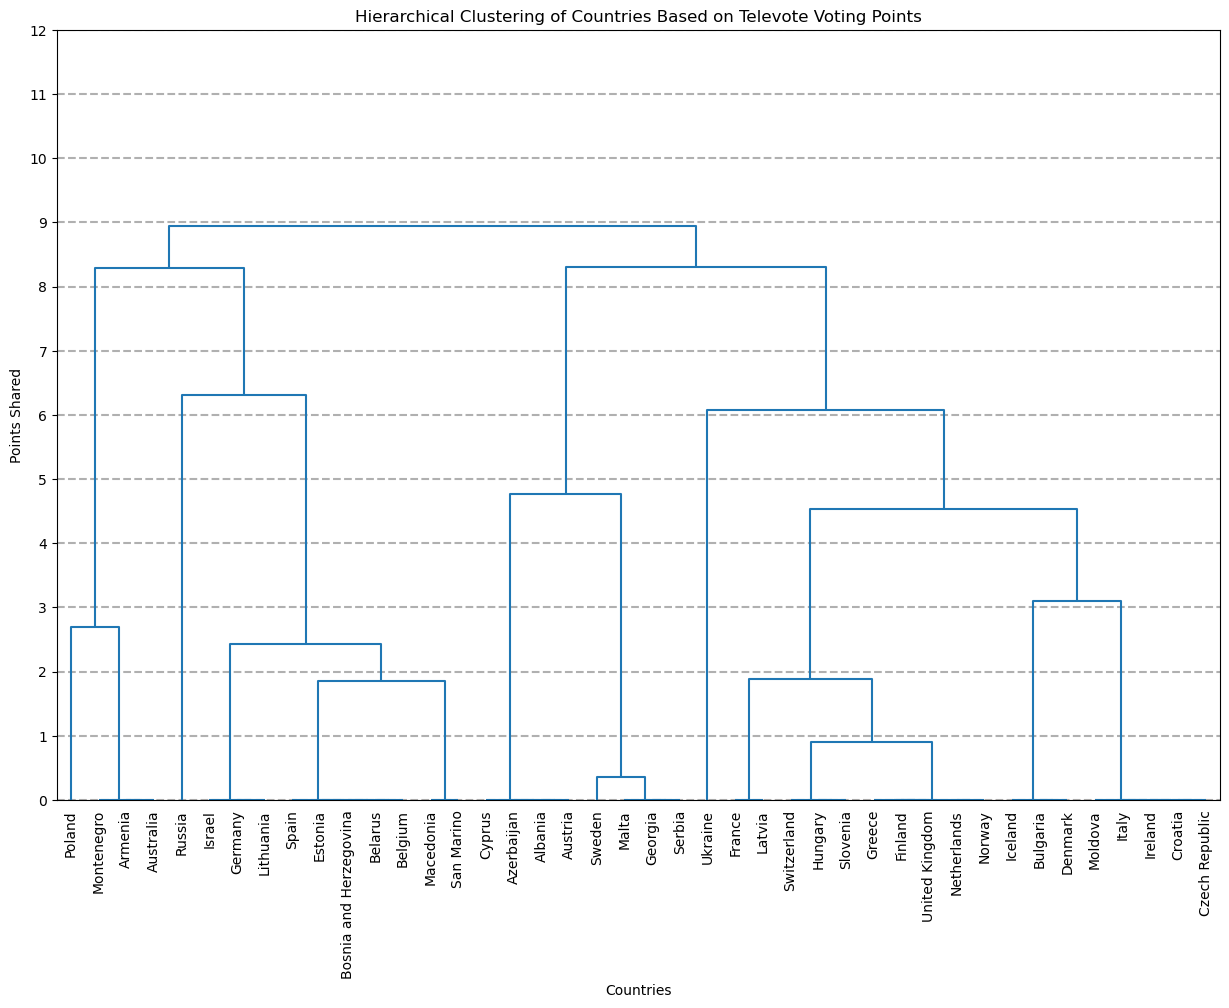

In [15]:
# Standardize country names
df2['countryfrom'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)
df2['countryto'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)

# Separate jury votes and televotes
jury_data = df2[df2['votetype'] == 'J']
televote_data = df2[df2['votetype'] == 'T']

# Extract unique countries
countries = sorted(df2['countryfrom'].unique())

# Create a dictionary to map countries to indices
country_index = {country: idx for idx, country in enumerate(countries)}

# Initialize adjacency matrices for jury and televote points
n = len(countries)
adj_matrix_jury = np.zeros((n, n))
adj_matrix_televote = np.zeros((n, n))

# Populate the jury adjacency matrix
for _, row in jury_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_jury[from_idx, to_idx] += points

# Ensure the jury adjacency matrix is symmetric
similarity_matrix_jury = (adj_matrix_jury + adj_matrix_jury.T) / 2

# Convert the similarity matrix for jury to a condensed form
condensed_similarity_matrix_jury = squareform(similarity_matrix_jury)

# Perform hierarchical clustering using the similarity matrix for jury
linked_jury = linkage(condensed_similarity_matrix_jury, method='ward')

# Plot the dendrogram for jury votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_jury,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Jury Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()

# Populate the televote adjacency matrix
for _, row in televote_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_televote[from_idx, to_idx] += points

# Ensure the televote adjacency matrix is symmetric
similarity_matrix_televote = (adj_matrix_televote + adj_matrix_televote.T) / 2

# Convert the similarity matrix for televote to a condensed form
condensed_similarity_matrix_televote = squareform(similarity_matrix_televote)

# Perform hierarchical clustering using the similarity matrix for televote
linked_televote = linkage(condensed_similarity_matrix_televote, method='ward')

# Plot the dendrogram for televote votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_televote,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Televote Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()


# Perform Geospatial Anaylsis 2016

In [16]:
# Calculate total points gained by each country
total_points_by_country = df2.groupby('countryto')['points'].sum()

# Calculate points given from one country to another
points_given = df2.groupby(['countryfrom', 'countryto'])['points'].sum().reset_index()


# Merge the points_given dataframe with the latLongFixed dataframe
points_given = points_given.merge(latLongFixed, left_on='countryfrom', right_on='countryfrom')

In [17]:
# List of European countries to focus on
european_countries = latLongFixed.countryfrom.tolist()

# Filter latLongFixed to include only European countries
latLongFixed_europe = latLongFixed[latLongFixed['countryfrom'].isin(european_countries)]

# Filter the total points data to include only European countries
total_points_by_country_europe = total_points_by_country[total_points_by_country.index.isin(european_countries)]

# Filter points_given to include only connections between European countries
points_given_europe = points_given[
    (points_given['countryfrom'].isin(european_countries)) &
    (points_given['countryto'].isin(european_countries))
]

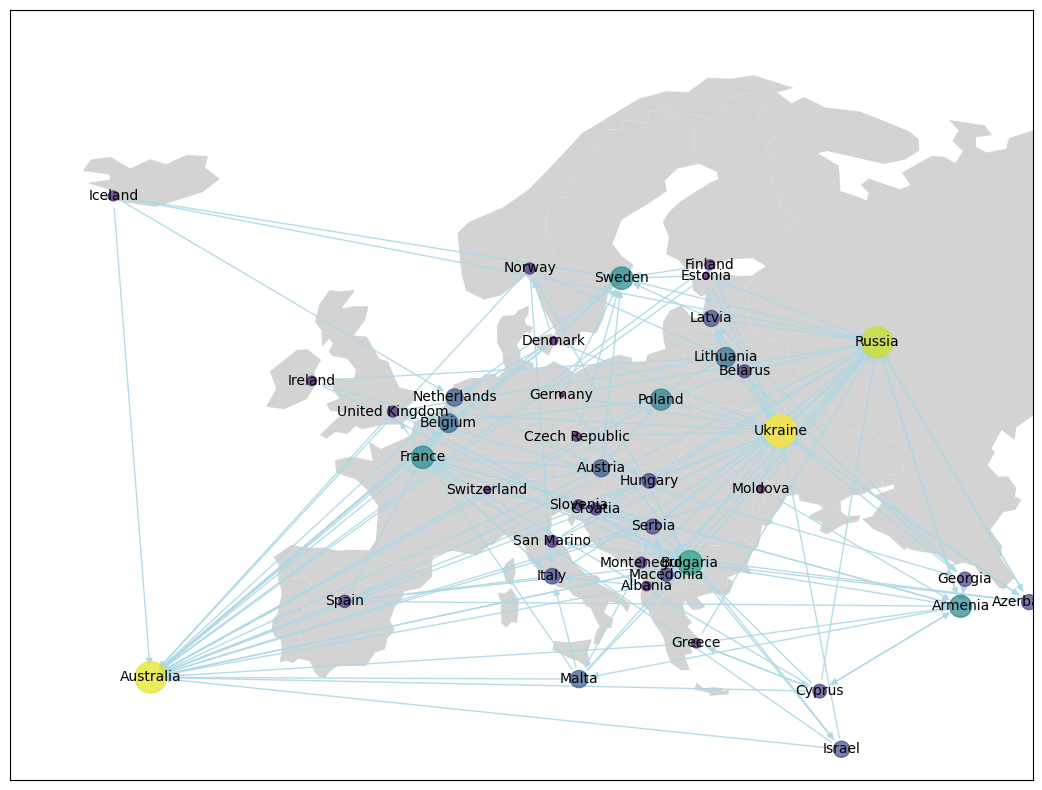

In [18]:
# Load a world map and filter for Europe
world = gpd.read_file('C:\\Users\\prajw\\Downloads\\ne_110m_admin_0_countries (1)\\ne_110m_admin_0_countries.shp')
europe = world[world['CONTINENT'] == 'Europe']

# Initialize a directed graph
G = nx.DiGraph()

# Set a default size in case points data is missing
default_size = 10

# Add nodes with total points as a node attribute, skip missing countries
for country, points in total_points_by_country_europe.items():
    if country not in latLongFixed_europe['countryfrom'].values:
        continue  # Skip countries with missing coordinates
    lat = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Latitude'].values[0]
    lon = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Longitude'].values[0]
    G.add_node(country, pos=(lon, lat), size=points if points else default_size)

# Add edges with the points given as the weight, but only if the weight is greater than 5
for _, row in points_given_europe.iterrows():
    if row['points'] >= 12 and row['countryfrom'] in G.nodes and row['countryto'] in G.nodes:
        G.add_edge(row['countryfrom'], row['countryto'], weight=row['points'])

# Extract positions and node sizes
pos = nx.get_node_attributes(G, 'pos')
sizes = [G.nodes[node].get('size', default_size) for node in G.nodes]

# Normalize the node sizes to create a color scale
norm = plt.Normalize(np.min(sizes), np.max(sizes))
node_colors = cm.viridis(norm(sizes))  # Using the 'viridis' colormap

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
europe.plot(ax=ax, color='lightgrey')

# Draw the graph with customized node colors
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightblue', alpha=0.9, arrows=True)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

# Adjust the view to focus on Europe
ax.set_xlim([-30, 50])  # Longitude range covering Europe
ax.set_ylim([30, 75])   # Latitude range covering Europe

plt.show()


# Perform Statistical Aanaylsis 2016

Correlation between Jury and Televote Points: 0.54 (p-value: 0.0002)


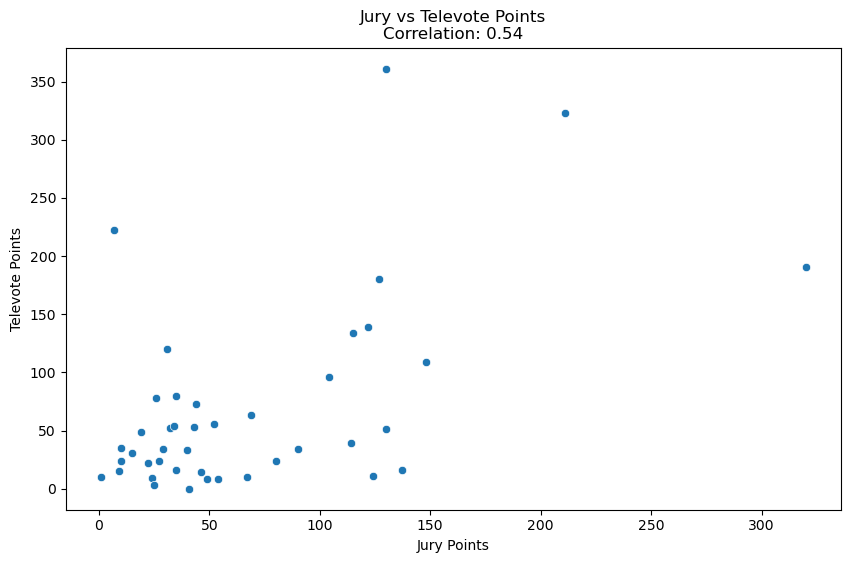

In [19]:
# Sum the points for each 'countryto'
jury_points = df_jury.groupby('countryto')['points'].sum()
televote_points = df_televote.groupby('countryto')['points'].sum()

# Combine into a single DataFrame
combined_points = pd.DataFrame({
    'Jury Points': jury_points,
    'Televote Points': televote_points
})

# Calculate the correlation
correlation, p_value = pearsonr(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Correlation between Jury and Televote Points: {correlation:.2f} (p-value: {p_value:.4f})")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jury Points', y='Televote Points', data=combined_points)
plt.title(f"Jury vs Televote Points\nCorrelation: {correlation:.2f}")
plt.xlabel('Jury Points')
plt.ylabel('Televote Points')
plt.show()


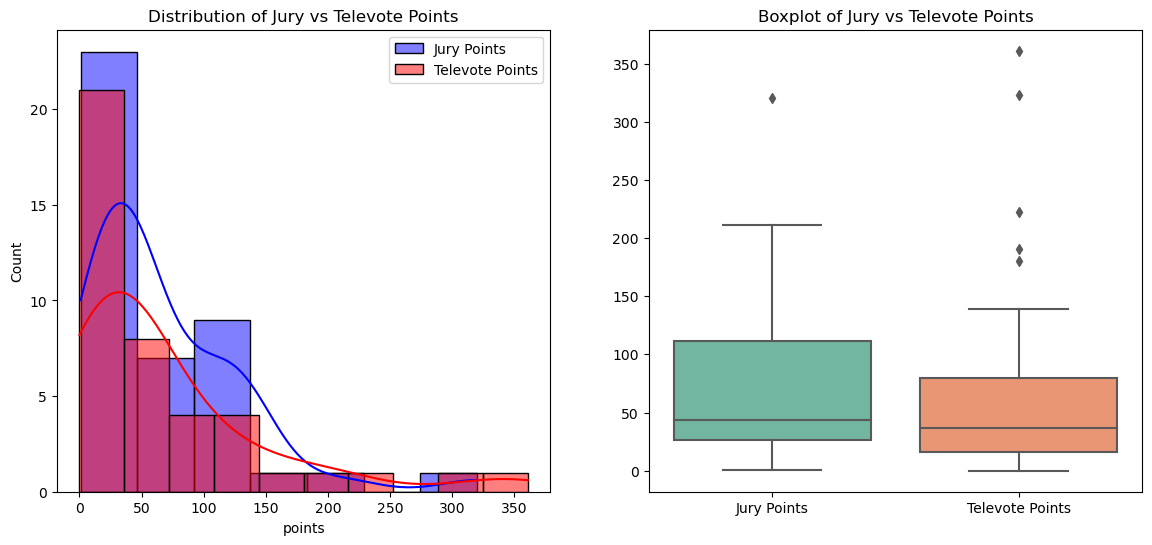

In [20]:
plt.figure(figsize=(14, 6))

# Histogram comparison
plt.subplot(1, 2, 1)
sns.histplot(jury_points, kde=True, color='blue', label='Jury Points')
sns.histplot(televote_points, kde=True, color='red', label='Televote Points')
plt.title("Distribution of Jury vs Televote Points")
plt.legend()

# Boxplot comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=[jury_points, televote_points], palette='Set2')
plt.xticks([0, 1], ['Jury Points', 'Televote Points'])
plt.title("Boxplot of Jury vs Televote Points")

plt.show()


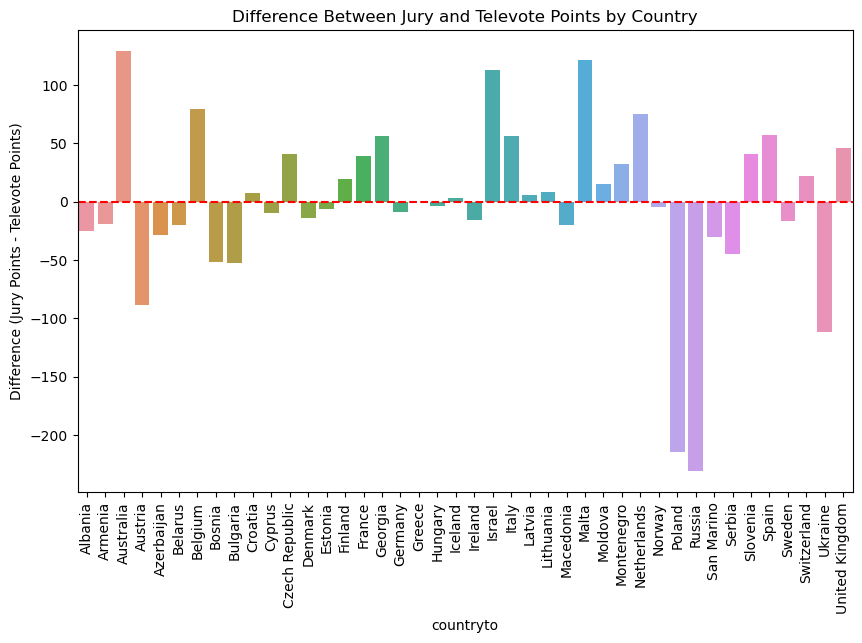

In [21]:
combined_points['Difference'] = combined_points['Jury Points'] - combined_points['Televote Points']

# Visualize the differences
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_points.index, y='Difference', data=combined_points)
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference Between Jury and Televote Points by Country')
plt.xticks(rotation=90)
plt.ylabel('Difference (Jury Points - Televote Points)')
plt.show()


In [22]:
# Paired t-test
t_stat, t_p_value = ttest_rel(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Paired t-test: t-statistic = {t_stat:.2f}, p-value = {t_p_value:.4f}")

# Wilcoxon signed-rank test
w_stat, w_p_value = wilcoxon(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Wilcoxon test: W-statistic = {w_stat:.2f}, p-value = {w_p_value:.4f}")


Paired t-test: t-statistic = -0.12, p-value = 0.9037
Wilcoxon test: W-statistic = 404.00, p-value = 0.7313


C:\Users\prajw\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [23]:
df3 = df[df['year'] == 2017]
df3 = df3.drop(columns = 'duplicate')

In [24]:
### Stantardazing countries names.
def applyRename(x):
    renamings ={
        'North Macedonia':'Macedonia',
        'F.Y.R. Macedonia':'Macedonia',
        'The Netherands': 'Netherlands',
        'The Netherlands':'Netherlands',
        'Bosnia & Herzegovina':'Bosnia',
    }
    return renamings[x] if x in renamings else x

df3['countryfrom'] = df3['countryfrom'].apply(applyRename)
df3['countryto']   = df3['countryto'].apply(applyRename)

In [25]:
#replicating  Yugoslavia's results to countries that part of it.
division = {'Yugoslavia':['Macedonia','Serbia','Montenegro','Slovenia','Bosnia','Croatia'], 'Serbia & Montenegro':['Serbia','Montenegro'] }

df3['countryfrom'] = df3['countryfrom'].apply(lambda x:division[x] if x in division else x)
df3['countryto']   = df3['countryto'].apply(lambda x:division[x] if x in division else x)
df3 = df3.explode('countryfrom').explode('countryto')

In [26]:
#keep only the points received at the highest stage (finals/semifinals)
df3['finalcode']= df3.final.map({'f':1,'sf':2,'sf1':2,'sf2':2})
temp1 = df3.groupby(['countryto','year']).agg({'finalcode':'min'});
df3 = pd.merge(df3,temp1, on=['countryto','year','finalcode'], how='inner')

assert len(df3.groupby(['countryfrom','countryto','year']).agg({'final':'nunique'}).query('final >1')) == 0

df3.drop(columns=['finalcode','edition'], inplace=True)

In [27]:
#The Winner
df3.query('final =="f"')\
    .groupby(['countryto','year']).agg({'points':'sum'}).reset_index()\
    .groupby('year').apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
    .sort_values('year',ascending=False)\
    .head(12).T.style.set_caption("The Winners")

In [28]:
# Assuming df3 is your Eurovision voting data DataFrame with columns 'year', 'countryfrom', 'countryto', 'points', 'votetype'
# Separate the data into jury and televote
df_jury = df3[df3['votetype'] == 'J']
df_televote = df3[df3['votetype'] == 'T']

# Perform Spectral Clustering 2017

In [29]:
def create_adjacency_matrix(df):
    countries = np.union1d(df['countryfrom'].unique(), df['countryto'].unique())
    adj_matrix = pd.DataFrame(0, index=countries, columns=countries)
    for _, row in df.iterrows():
        adj_matrix.at[row['countryfrom'], row['countryto']] += row['points']
    return adj_matrix

# Create adjacency matrices for jury and televote
adj_matrix_jury = create_adjacency_matrix(df_jury)
adj_matrix_televote = create_adjacency_matrix(df_televote)

C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

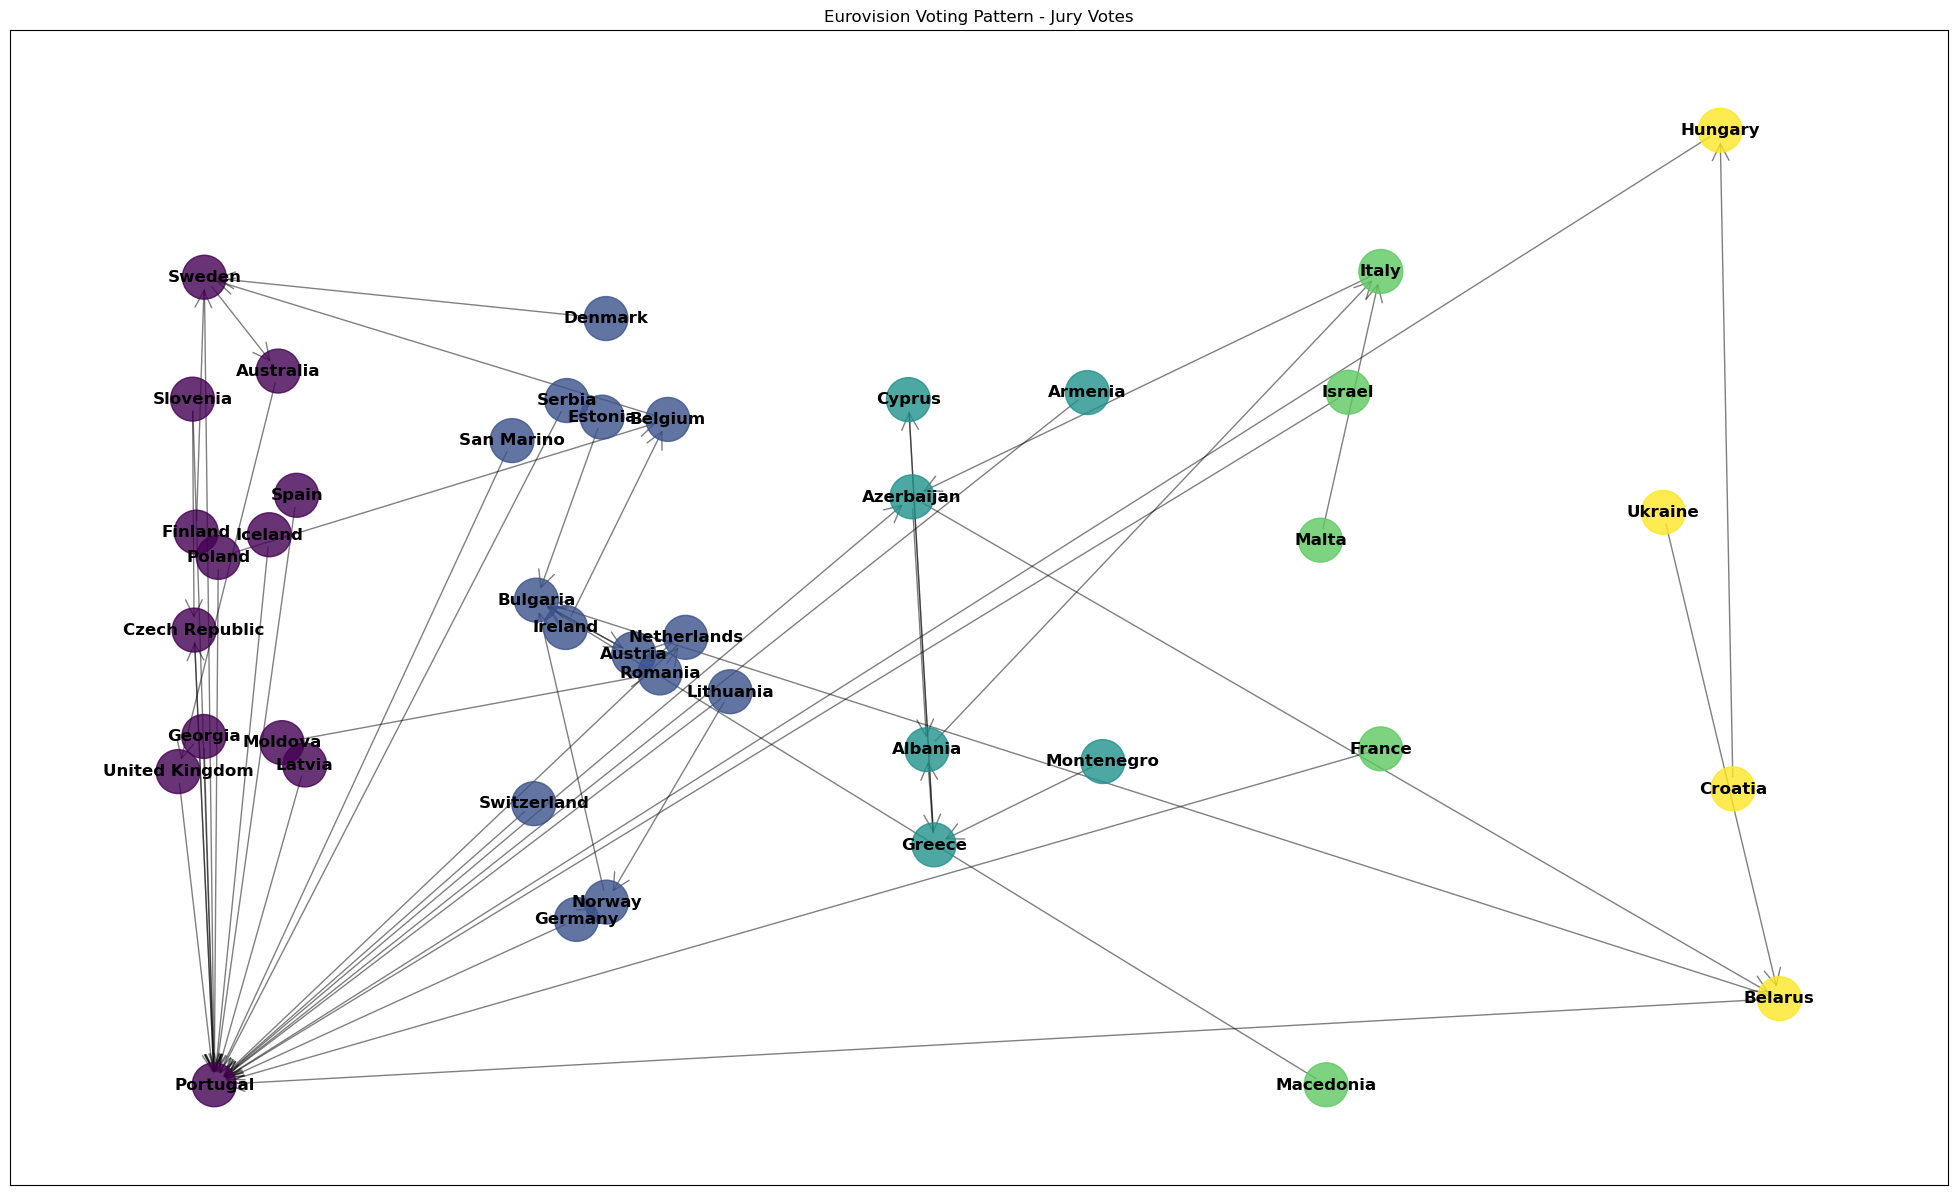

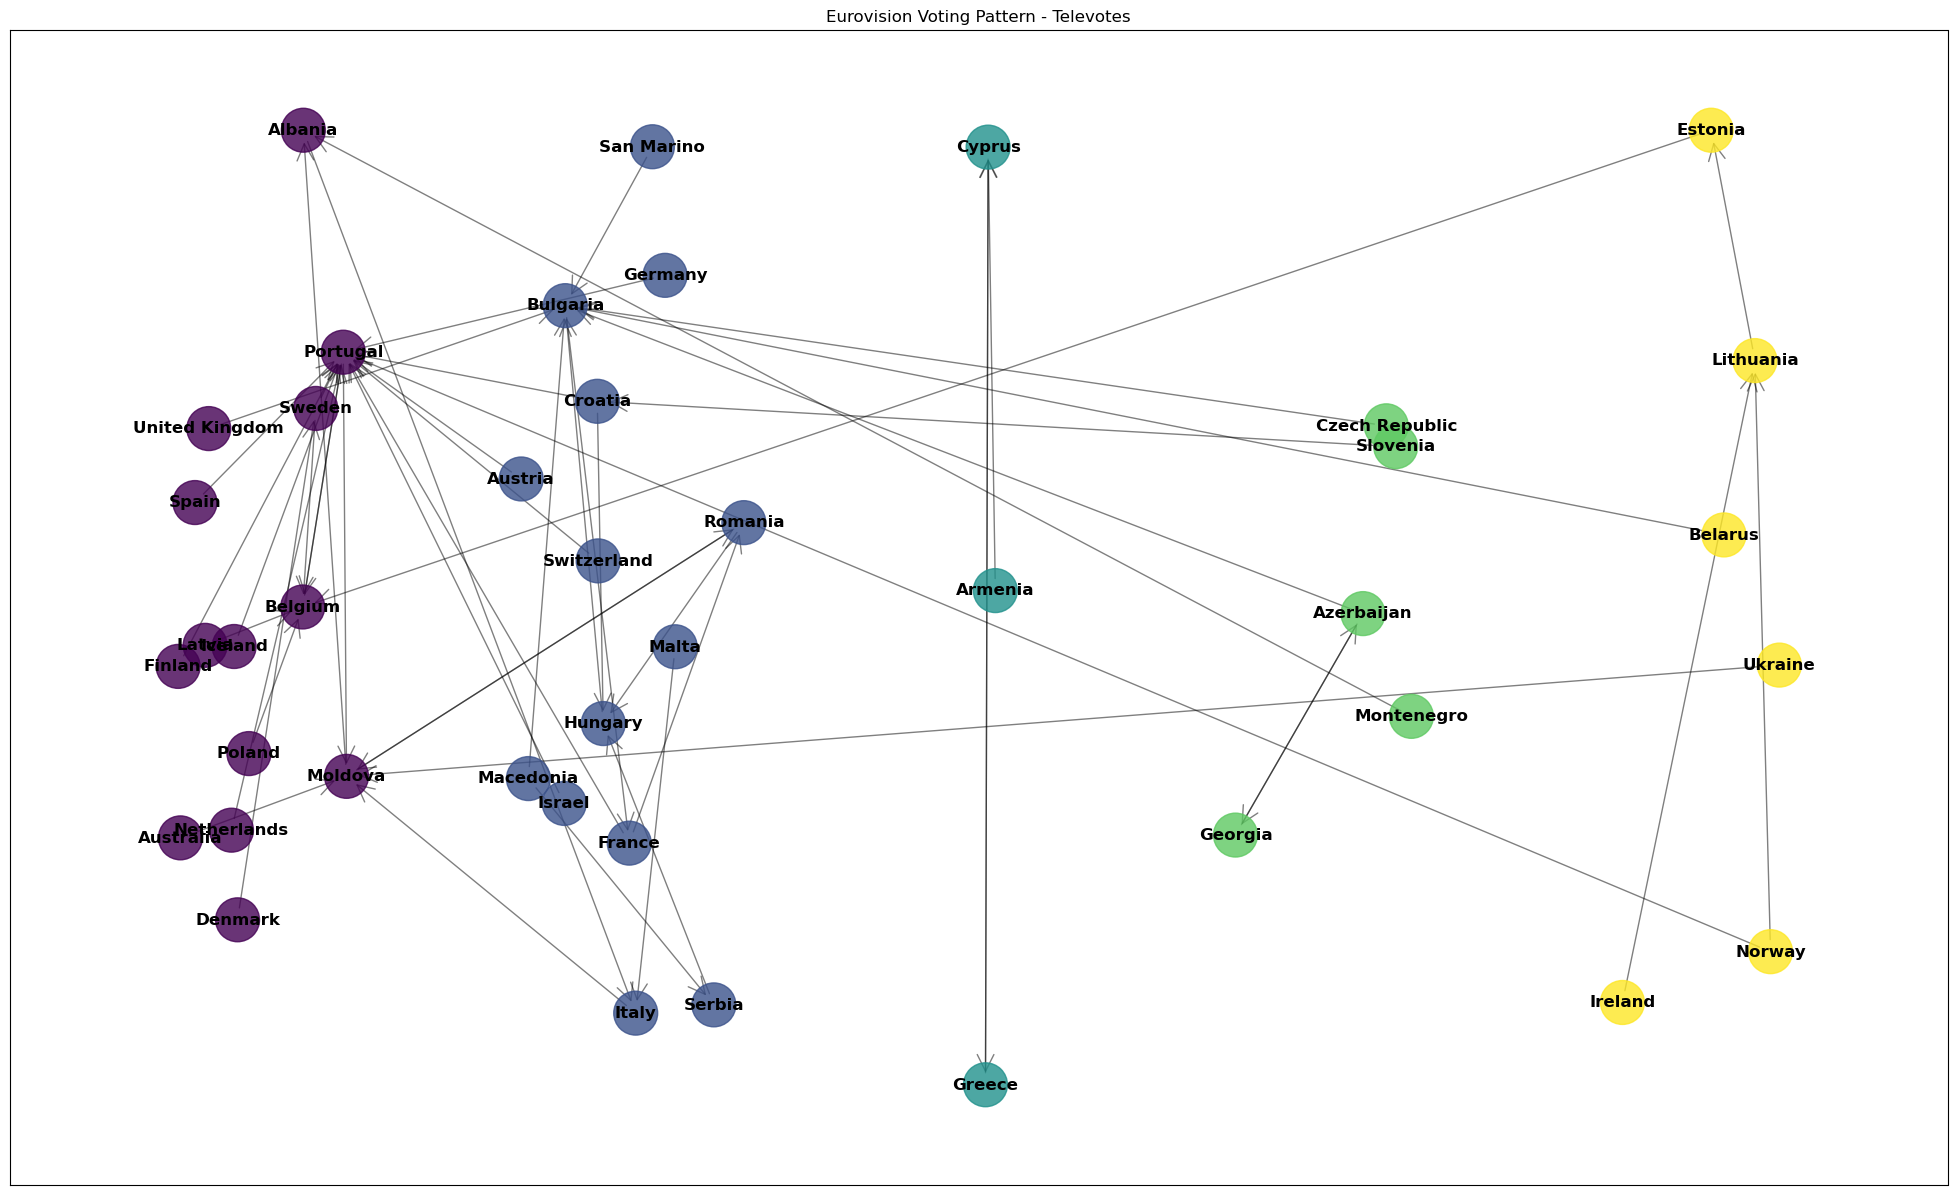

In [30]:
def perform_spectral_clustering(adj_matrix, n_clusters=5):
    sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = sc.fit_predict(adj_matrix)
    return labels

# Perform spectral clustering for jury and televote
labels_jury = perform_spectral_clustering(adj_matrix_jury)
labels_televote = perform_spectral_clustering(adj_matrix_televote)

# Function to select the top percent of edges
def selectTopPercent(df, weight_col, percent=0.3):
    df = df.sort_values(by=weight_col, ascending=False)
    cum_sum = df[weight_col].cumsum()
    total_sum = df[weight_col].sum()
    return df[cum_sum <= total_sum * percent]

# Function to plot directed graph with community labels
def plot_directed_graph(adj_matrix, labels, countries, title, edge_fraction=1.0):
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    unique_labels = list(set(labels))
    cluster_count = len(unique_labels)
    
    # Initialize positions dictionary
    pos = {}
    for i, label in enumerate(unique_labels):
        cluster_nodes = [node for node, cluster in enumerate(labels) if cluster == label]
        cluster_pos = nx.kamada_kawai_layout(G.subgraph(cluster_nodes))
        
        # Offset positions to place clusters side by side
        offset = np.array([i * 3, 0])
        for node in cluster_nodes:
            pos[node] = cluster_pos[node] + offset

    plt.figure(figsize=(25, 15))  # larger figure size for better spacing

    # Prepare edges
    edges_df = nx.to_pandas_edgelist(G)
    edges_df['weight'] = [adj_matrix[u, v] for u, v in zip(edges_df['source'], edges_df['target'])]

    if edge_fraction < 1.0:
        edges_df = edges_df.groupby('source').apply(selectTopPercent, 'weight', edge_fraction).reset_index(drop=True)

    # Draw edges first
    edge_list = list(zip(edges_df['source'], edges_df['target']))
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, arrowstyle='->', arrowsize=30, alpha=0.5)

    # Draw nodes and labels on top of edges
    nx.draw_networkx_nodes(G, pos, node_size=1000, cmap=plt.cm.viridis, node_color=labels, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=dict(enumerate(countries)), font_size=12, font_weight='bold')

    # Title and display
    plt.title(title)
    plt.show()

# Convert adjacency matrices to numpy arrays for spectral clustering
adj_matrix_jury_np = adj_matrix_jury.values
adj_matrix_televote_np = adj_matrix_televote.values

# Plot the graphs
countries = adj_matrix_jury.index.tolist()
plot_directed_graph(adj_matrix_jury_np, labels_jury, countries, 'Eurovision Voting Pattern - Jury Votes', edge_fraction=0.3)
plot_directed_graph(adj_matrix_televote_np, labels_televote, countries, 'Eurovision Voting Pattern - Televotes', edge_fraction=0.3)


# Perform Hierarchical Clustering 2017

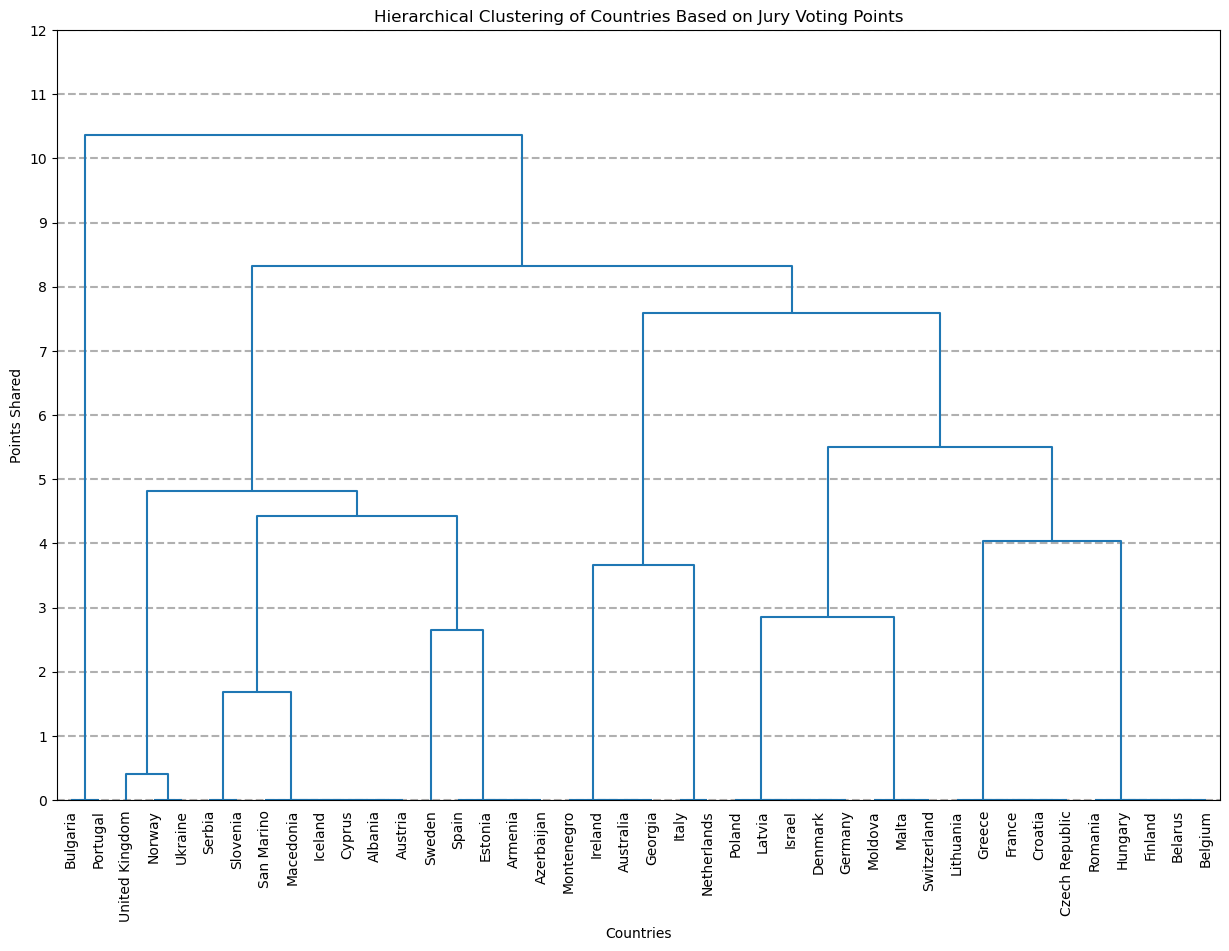

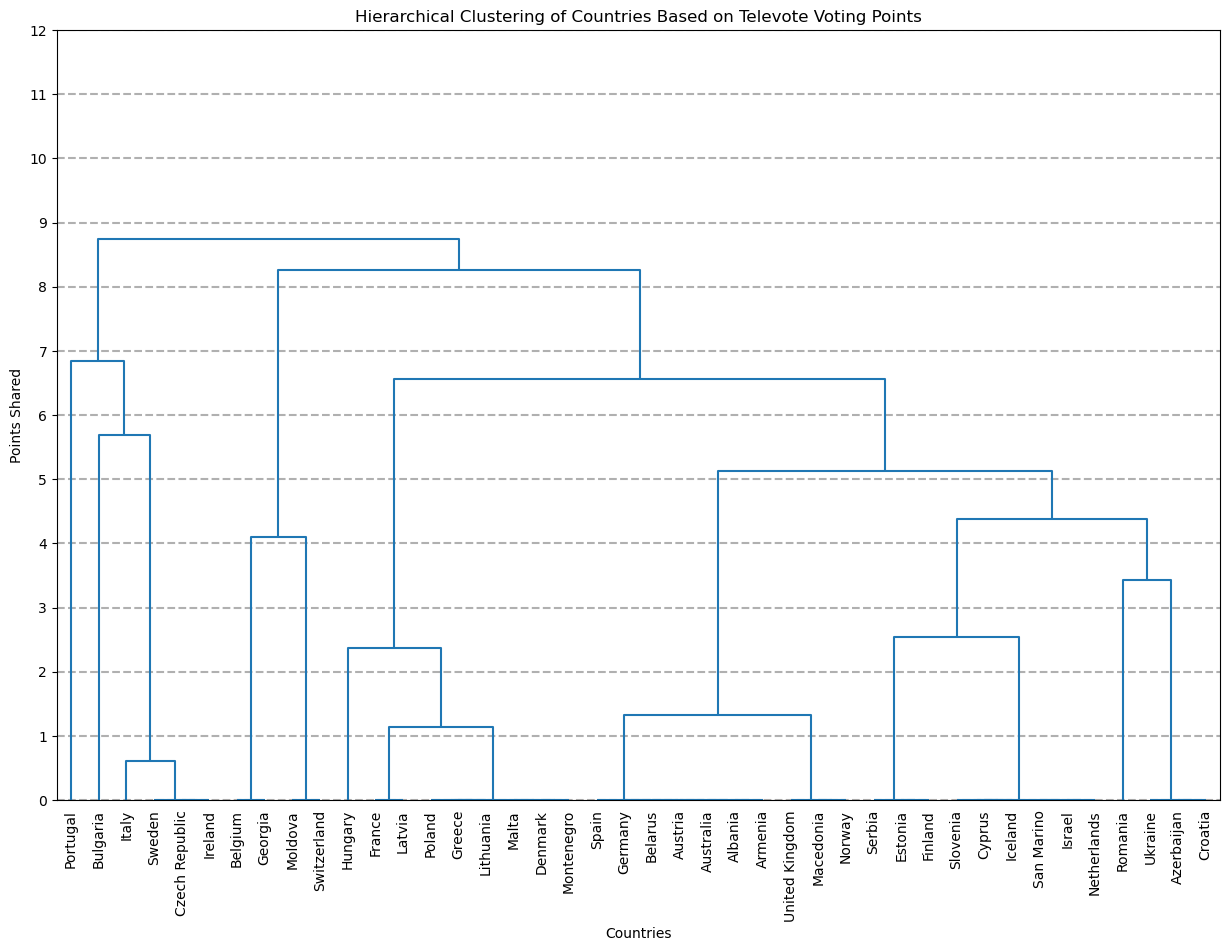

In [31]:
# Standardize country names
df3['countryfrom'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)
df3['countryto'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)

# Separate jury votes and televotes
jury_data = df3[df3['votetype'] == 'J']
televote_data = df3[df3['votetype'] == 'T']

# Extract unique countries
countries = sorted(df3['countryfrom'].unique())

# Create a dictionary to map countries to indices
country_index = {country: idx for idx, country in enumerate(countries)}

# Initialize adjacency matrices for jury and televote points
n = len(countries)
adj_matrix_jury = np.zeros((n, n))
adj_matrix_televote = np.zeros((n, n))

# Populate the jury adjacency matrix
for _, row in jury_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_jury[from_idx, to_idx] += points

# Ensure the jury adjacency matrix is symmetric
similarity_matrix_jury = (adj_matrix_jury + adj_matrix_jury.T) / 2

# Convert the similarity matrix for jury to a condensed form
condensed_similarity_matrix_jury = squareform(similarity_matrix_jury)

# Perform hierarchical clustering using the similarity matrix for jury
linked_jury = linkage(condensed_similarity_matrix_jury, method='ward')

# Plot the dendrogram for jury votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_jury,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Jury Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()

# Populate the televote adjacency matrix
for _, row in televote_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_televote[from_idx, to_idx] += points

# Ensure the televote adjacency matrix is symmetric
similarity_matrix_televote = (adj_matrix_televote + adj_matrix_televote.T) / 2

# Convert the similarity matrix for televote to a condensed form
condensed_similarity_matrix_televote = squareform(similarity_matrix_televote)

# Perform hierarchical clustering using the similarity matrix for televote
linked_televote = linkage(condensed_similarity_matrix_televote, method='ward')

# Plot the dendrogram for televote votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_televote,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Televote Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()


# Perform Geospatial Anaylsis 2017

In [32]:
# Calculate total points gained by each country
total_points_by_country = df3.groupby('countryto')['points'].sum()

# Calculate points given from one country to another
points_given = df3.groupby(['countryfrom', 'countryto'])['points'].sum().reset_index()


# Merge the points_given dataframe with the latLongFixed dataframe
points_given = points_given.merge(latLongFixed, left_on='countryfrom', right_on='countryfrom')

In [33]:
# List of European countries to focus on
european_countries = latLongFixed.countryfrom.tolist()

# Filter latLongFixed to include only European countries
latLongFixed_europe = latLongFixed[latLongFixed['countryfrom'].isin(european_countries)]

# Filter the total points data to include only European countries
total_points_by_country_europe = total_points_by_country[total_points_by_country.index.isin(european_countries)]

# Filter points_given to include only connections between European countries
points_given_europe = points_given[
    (points_given['countryfrom'].isin(european_countries)) &
    (points_given['countryto'].isin(european_countries))
]

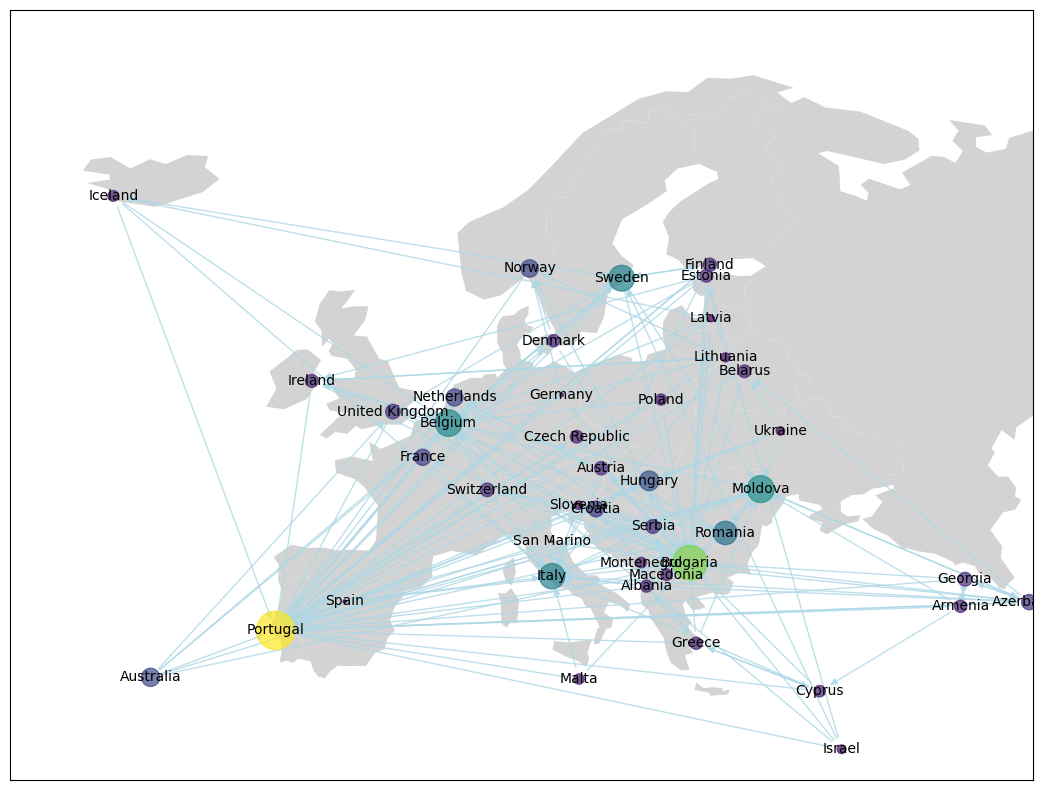

In [34]:
# Load a world map and filter for Europe
world = gpd.read_file('C:\\Users\\prajw\\Downloads\\ne_110m_admin_0_countries (1)\\ne_110m_admin_0_countries.shp')
europe = world[world['CONTINENT'] == 'Europe']

# Initialize a directed graph
G = nx.DiGraph()

# Set a default size in case points data is missing
default_size = 10

# Add nodes with total points as a node attribute, skip missing countries
for country, points in total_points_by_country_europe.items():
    if country not in latLongFixed_europe['countryfrom'].values:
        continue  # Skip countries with missing coordinates
    lat = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Latitude'].values[0]
    lon = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Longitude'].values[0]
    G.add_node(country, pos=(lon, lat), size=points if points else default_size)

# Add edges with the points given as the weight, but only if the weight is greater than 5
for _, row in points_given_europe.iterrows():
    if row['points'] >= 12 and row['countryfrom'] in G.nodes and row['countryto'] in G.nodes:
        G.add_edge(row['countryfrom'], row['countryto'], weight=row['points'])

# Extract positions and node sizes
pos = nx.get_node_attributes(G, 'pos')
sizes = [G.nodes[node].get('size', default_size) for node in G.nodes]

# Normalize the node sizes to create a color scale
norm = plt.Normalize(np.min(sizes), np.max(sizes))
node_colors = cm.viridis(norm(sizes))  # Using the 'viridis' colormap

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
europe.plot(ax=ax, color='lightgrey')

# Draw the graph with customized node colors
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightblue', alpha=0.8, arrows=True)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

# Adjust the view to focus on Europe
ax.set_xlim([-30, 50])  # Longitude range covering Europe
ax.set_ylim([30, 75])   # Latitude range covering Europe

plt.show()


Correlation between Jury and Televote Points: 0.68 (p-value: 0.0000)


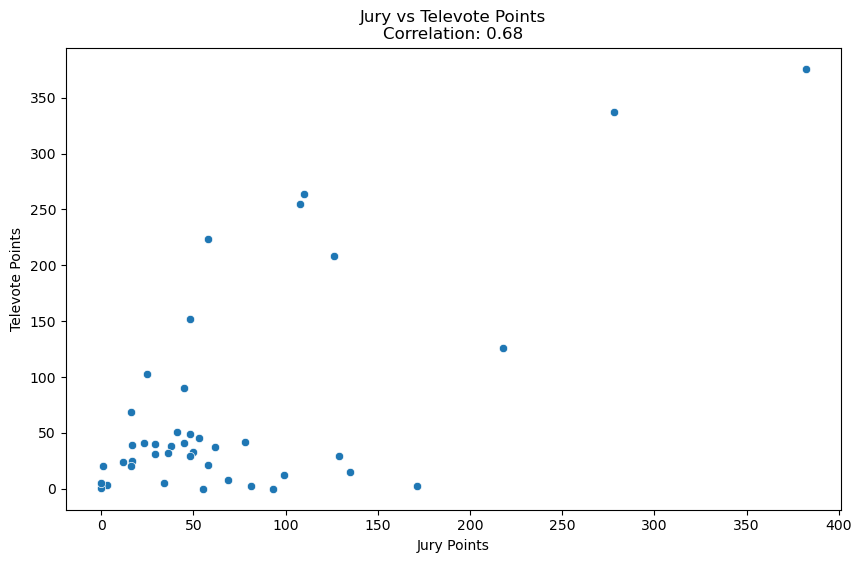

In [35]:
# Sum the points for each 'countryto'
jury_points = df_jury.groupby('countryto')['points'].sum()
televote_points = df_televote.groupby('countryto')['points'].sum()

# Combine into a single DataFrame
combined_points = pd.DataFrame({
    'Jury Points': jury_points,
    'Televote Points': televote_points
})

# Calculate the correlation
correlation, p_value = pearsonr(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Correlation between Jury and Televote Points: {correlation:.2f} (p-value: {p_value:.4f})")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jury Points', y='Televote Points', data=combined_points)
plt.title(f"Jury vs Televote Points\nCorrelation: {correlation:.2f}")
plt.xlabel('Jury Points')
plt.ylabel('Televote Points')
plt.show()


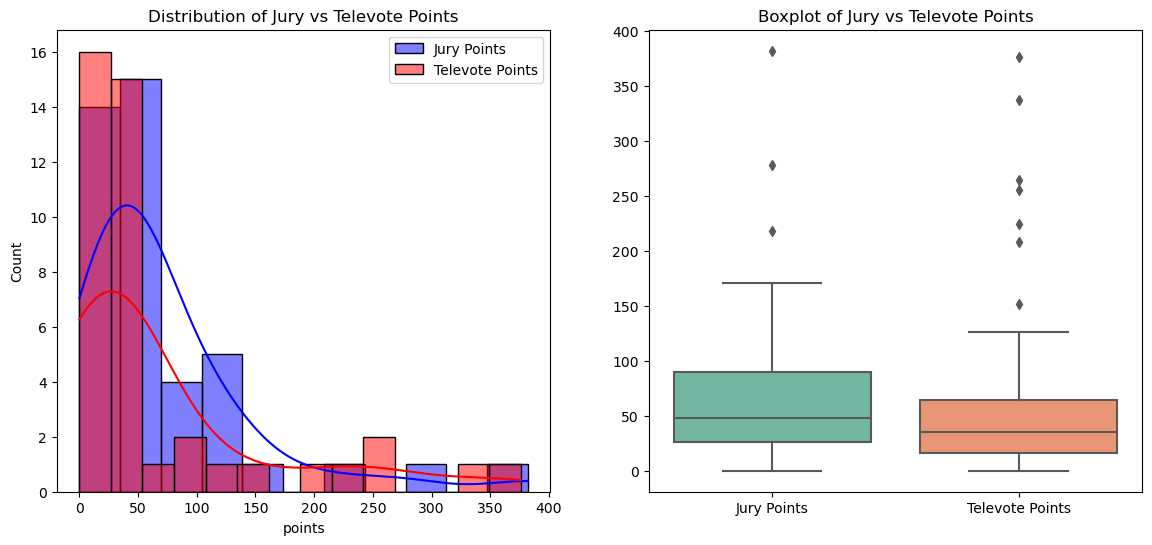

In [36]:
plt.figure(figsize=(14, 6))

# Histogram comparison
plt.subplot(1, 2, 1)
sns.histplot(jury_points, kde=True, color='blue', label='Jury Points')
sns.histplot(televote_points, kde=True, color='red', label='Televote Points')
plt.title("Distribution of Jury vs Televote Points")
plt.legend()

# Boxplot comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=[jury_points, televote_points], palette='Set2')
plt.xticks([0, 1], ['Jury Points', 'Televote Points'])
plt.title("Boxplot of Jury vs Televote Points")

plt.show()


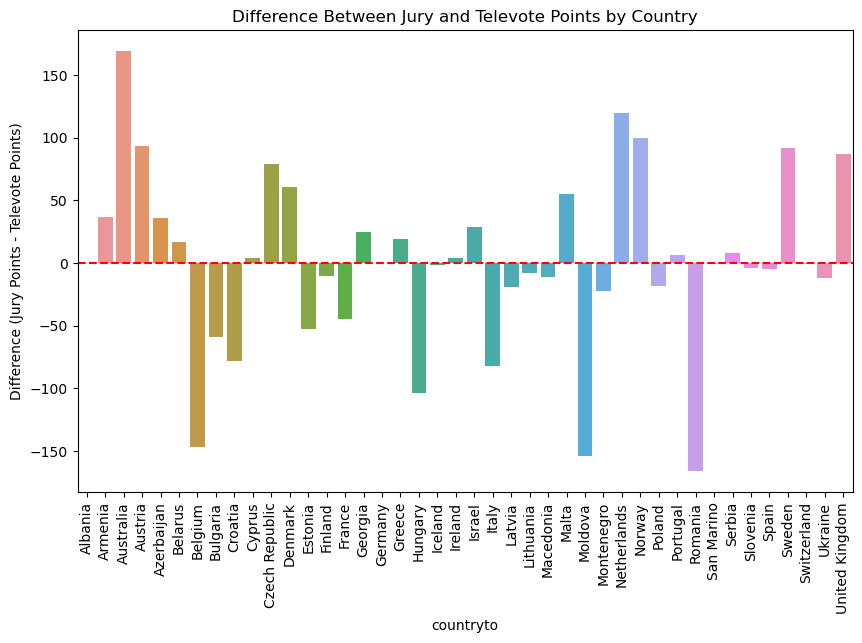

In [37]:
combined_points['Difference'] = combined_points['Jury Points'] - combined_points['Televote Points']

# Visualize the differences
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_points.index, y='Difference', data=combined_points)
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference Between Jury and Televote Points by Country')
plt.xticks(rotation=90)
plt.ylabel('Difference (Jury Points - Televote Points)')
plt.show()


In [38]:
from scipy.stats import ttest_rel, wilcoxon

# Paired t-test
t_stat, t_p_value = ttest_rel(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Paired t-test: t-statistic = {t_stat:.2f}, p-value = {t_p_value:.4f}")

# Wilcoxon signed-rank test
w_stat, w_p_value = wilcoxon(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Wilcoxon test: W-statistic = {w_stat:.2f}, p-value = {w_p_value:.4f}")


Paired t-test: t-statistic = 0.09, p-value = 0.9304
Wilcoxon test: W-statistic = 393.00, p-value = 0.8192


C:\Users\prajw\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [39]:
df4 = df[df['year'] == 2018]
df4 = df4.drop(columns = 'duplicate')

In [40]:
### Stantardazing countries names.
def applyRename(x):
    renamings ={
        'North Macedonia':'Macedonia',
        'F.Y.R. Macedonia':'Macedonia',
        'The Netherands': 'Netherlands',
        'The Netherlands':'Netherlands',
        'Bosnia & Herzegovina':'Bosnia',
    }
    return renamings[x] if x in renamings else x

df4['countryfrom'] = df4['countryfrom'].apply(applyRename)
df4['countryto']   = df4['countryto'].apply(applyRename)

In [41]:
#replicating  Yugoslavia's results to countries that part of it.
division = {'Yugoslavia':['Macedonia','Serbia','Montenegro','Slovenia','Bosnia','Croatia'], 'Serbia & Montenegro':['Serbia','Montenegro'] }

df4['countryfrom'] = df4['countryfrom'].apply(lambda x:division[x] if x in division else x)
df4['countryto']   = df4['countryto'].apply(lambda x:division[x] if x in division else x)
df4 = df4.explode('countryfrom').explode('countryto')

In [42]:
#keep only the points received at the highest stage (finals/semifinals)
df4['finalcode']= df4.final.map({'f':1,'sf':2,'sf1':2,'sf2':2})
temp1 = df4.groupby(['countryto','year']).agg({'finalcode':'min'});
df4 = pd.merge(df4,temp1, on=['countryto','year','finalcode'], how='inner')

assert len(df4.groupby(['countryfrom','countryto','year']).agg({'final':'nunique'}).query('final >1')) == 0

df4.drop(columns=['finalcode','edition'], inplace=True)

In [43]:
#The Winner
df4.query('final =="f"')\
    .groupby(['countryto','year']).agg({'points':'sum'}).reset_index()\
    .groupby('year').apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
    .sort_values('year',ascending=False)\
    .head(12).T.style.set_caption("The Winners")

In [44]:
# Assuming df2 is your Eurovision voting data DataFrame with columns 'year', 'countryfrom', 'countryto', 'points', 'votetype'
# Separate the data into jury and televote
df_jury = df4[df4['votetype'] == 'J']
df_televote = df4[df4['votetype'] == 'T']

# Perform Spectral Clustering 2018

In [45]:
def create_adjacency_matrix(df):
    countries = np.union1d(df['countryfrom'].unique(), df['countryto'].unique())
    adj_matrix = pd.DataFrame(0, index=countries, columns=countries)
    for _, row in df.iterrows():
        adj_matrix.at[row['countryfrom'], row['countryto']] += row['points']
    return adj_matrix

# Create adjacency matrices for jury and televote
adj_matrix_jury = create_adjacency_matrix(df_jury)
adj_matrix_televote = create_adjacency_matrix(df_televote)

C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

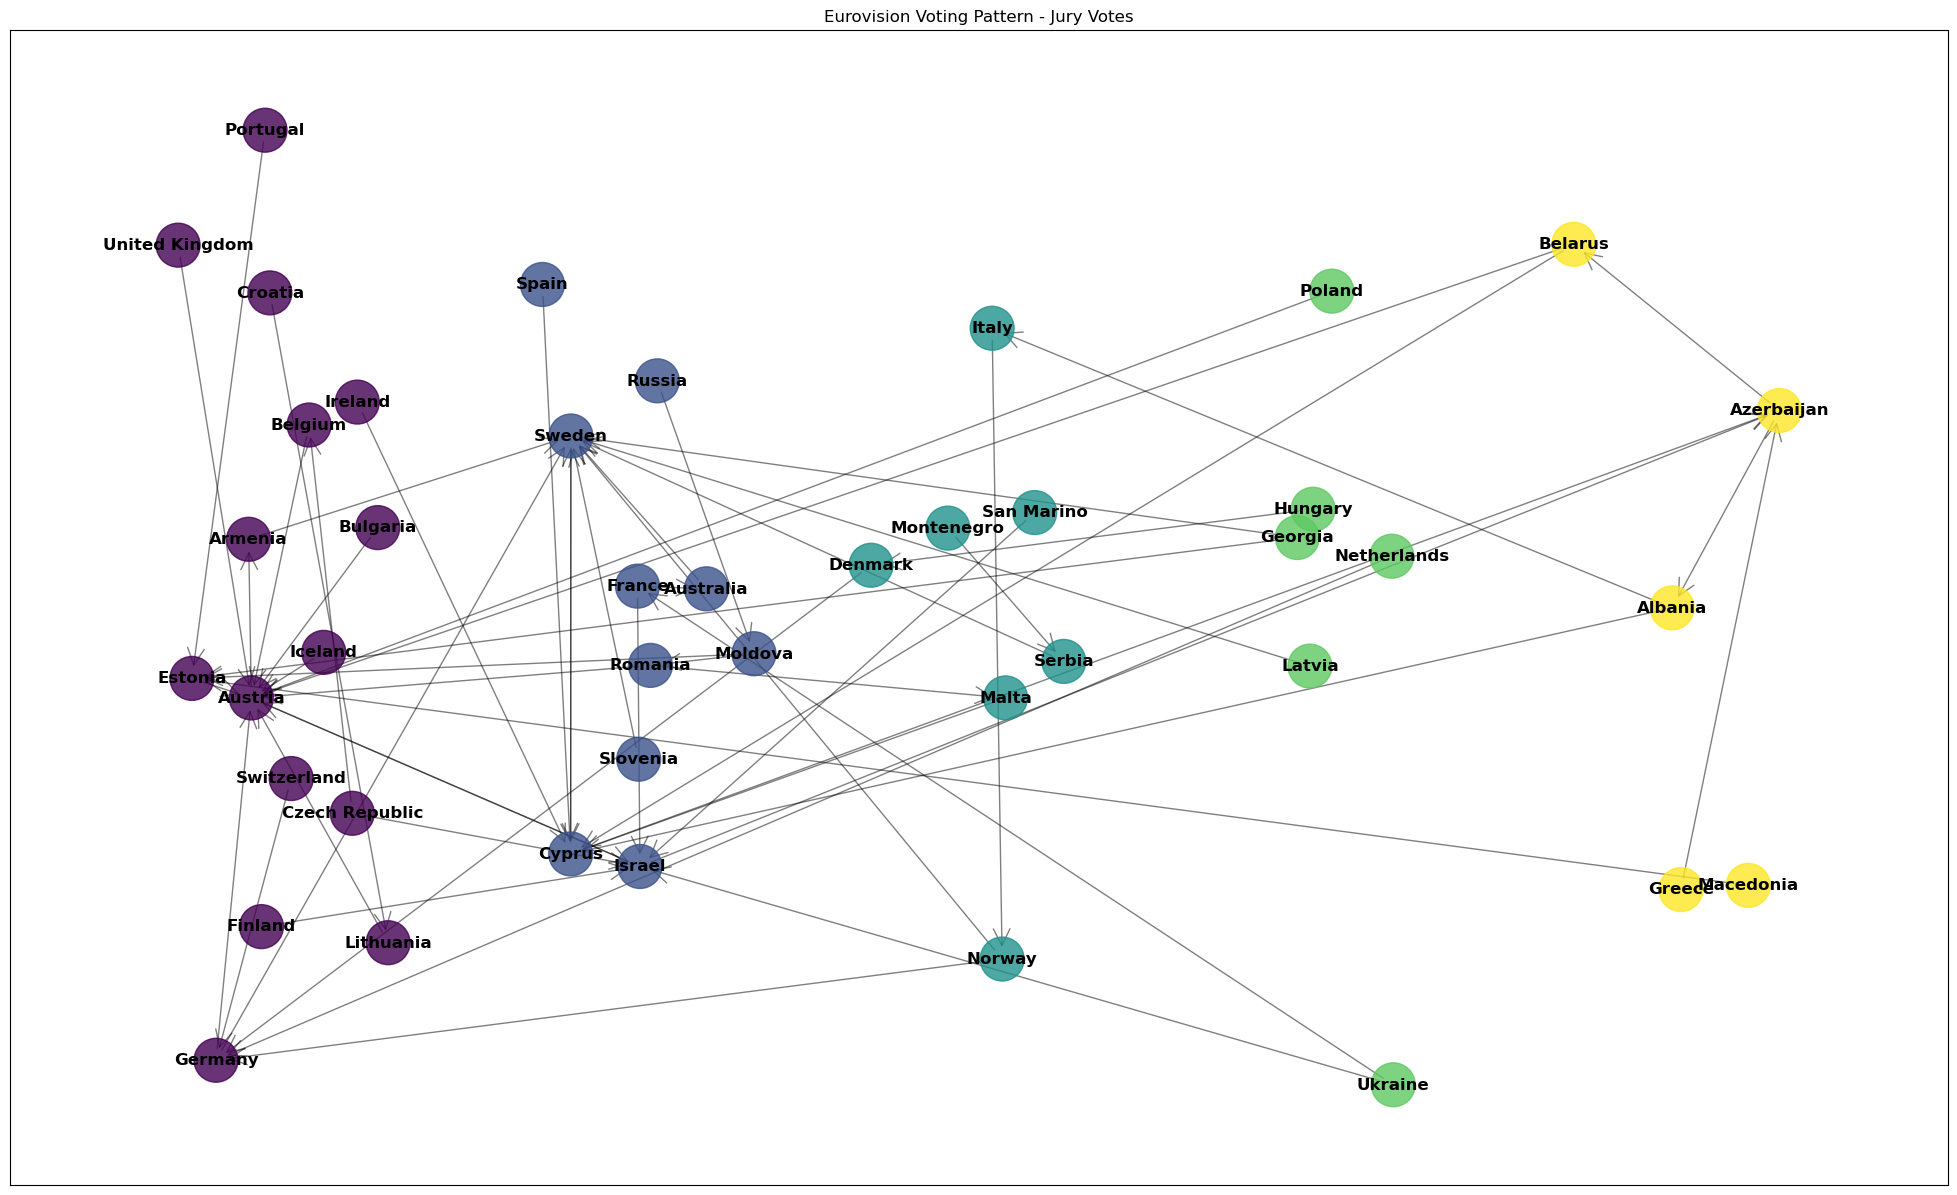

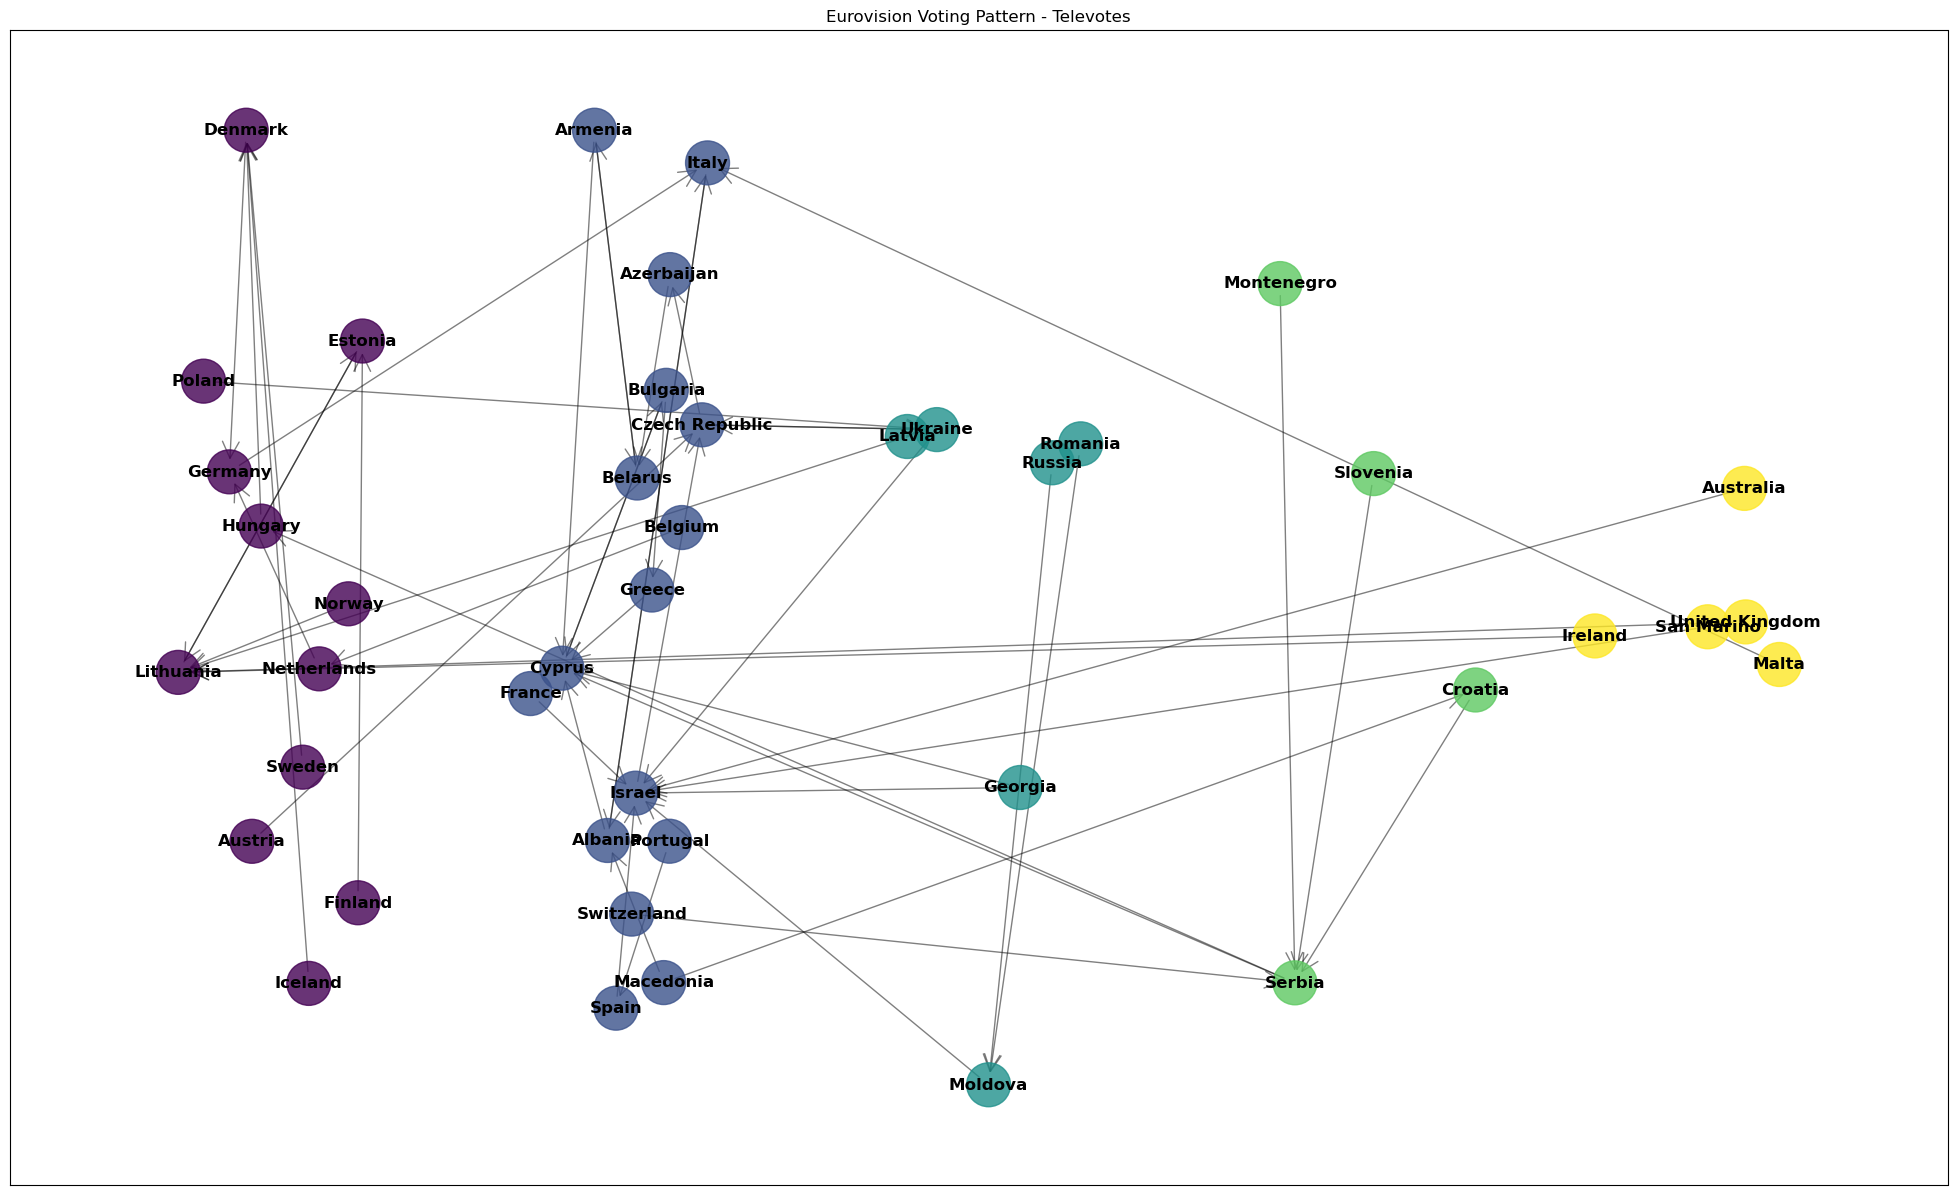

In [46]:
def perform_spectral_clustering(adj_matrix, n_clusters=5):
    sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = sc.fit_predict(adj_matrix)
    return labels

# Perform spectral clustering for jury and televote
labels_jury = perform_spectral_clustering(adj_matrix_jury)
labels_televote = perform_spectral_clustering(adj_matrix_televote)

# Function to select the top percent of edges
def selectTopPercent(df, weight_col, percent=0.3):
    df = df.sort_values(by=weight_col, ascending=False)
    cum_sum = df[weight_col].cumsum()
    total_sum = df[weight_col].sum()
    return df[cum_sum <= total_sum * percent]

# Function to plot directed graph with community labels
def plot_directed_graph(adj_matrix, labels, countries, title, edge_fraction=1.0):
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    unique_labels = list(set(labels))
    cluster_count = len(unique_labels)
    
    # Initialize positions dictionary
    pos = {}
    for i, label in enumerate(unique_labels):
        cluster_nodes = [node for node, cluster in enumerate(labels) if cluster == label]
        cluster_pos = nx.kamada_kawai_layout(G.subgraph(cluster_nodes))
        
        # Offset positions to place clusters side by side
        offset = np.array([i * 3, 0])
        for node in cluster_nodes:
            pos[node] = cluster_pos[node] + offset

    plt.figure(figsize=(25, 15))  # larger figure size for better spacing

    # Prepare edges
    edges_df = nx.to_pandas_edgelist(G)
    edges_df['weight'] = [adj_matrix[u, v] for u, v in zip(edges_df['source'], edges_df['target'])]

    if edge_fraction < 1.0:
        edges_df = edges_df.groupby('source').apply(selectTopPercent, 'weight', edge_fraction).reset_index(drop=True)

    # Draw edges first
    edge_list = list(zip(edges_df['source'], edges_df['target']))
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, arrowstyle='->', arrowsize=30, alpha=0.5)

    # Draw nodes and labels on top of edges
    nx.draw_networkx_nodes(G, pos, node_size=1000, cmap=plt.cm.viridis, node_color=labels, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=dict(enumerate(countries)), font_size=12, font_weight='bold')

    # Title and display
    plt.title(title)
    plt.show()

# Convert adjacency matrices to numpy arrays for spectral clustering
adj_matrix_jury_np = adj_matrix_jury.values
adj_matrix_televote_np = adj_matrix_televote.values

# Plot the graphs
countries = adj_matrix_jury.index.tolist()
plot_directed_graph(adj_matrix_jury_np, labels_jury, countries, 'Eurovision Voting Pattern - Jury Votes', edge_fraction=0.3)
plot_directed_graph(adj_matrix_televote_np, labels_televote, countries, 'Eurovision Voting Pattern - Televotes', edge_fraction=0.3)


# Perform Hierarchical Clustering 2018

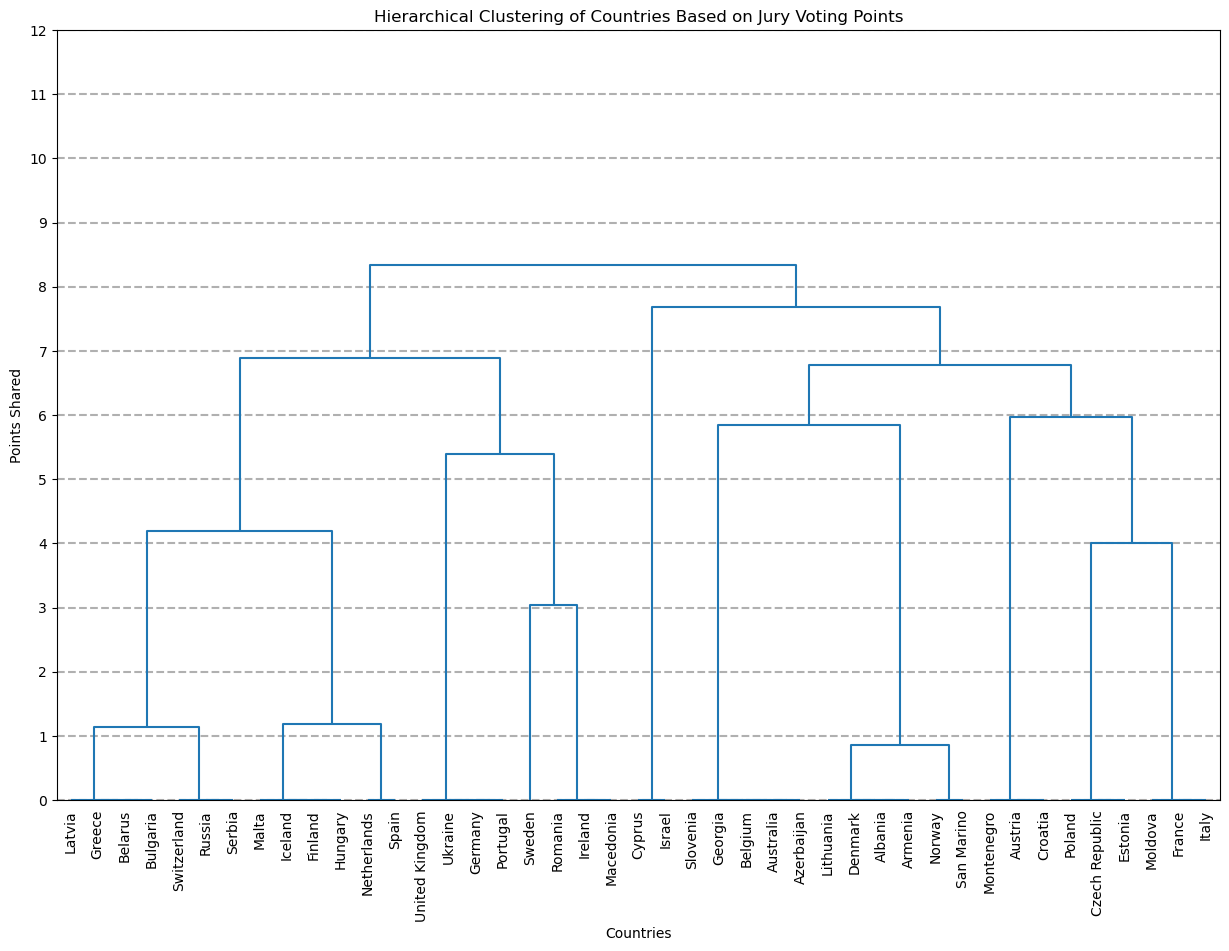

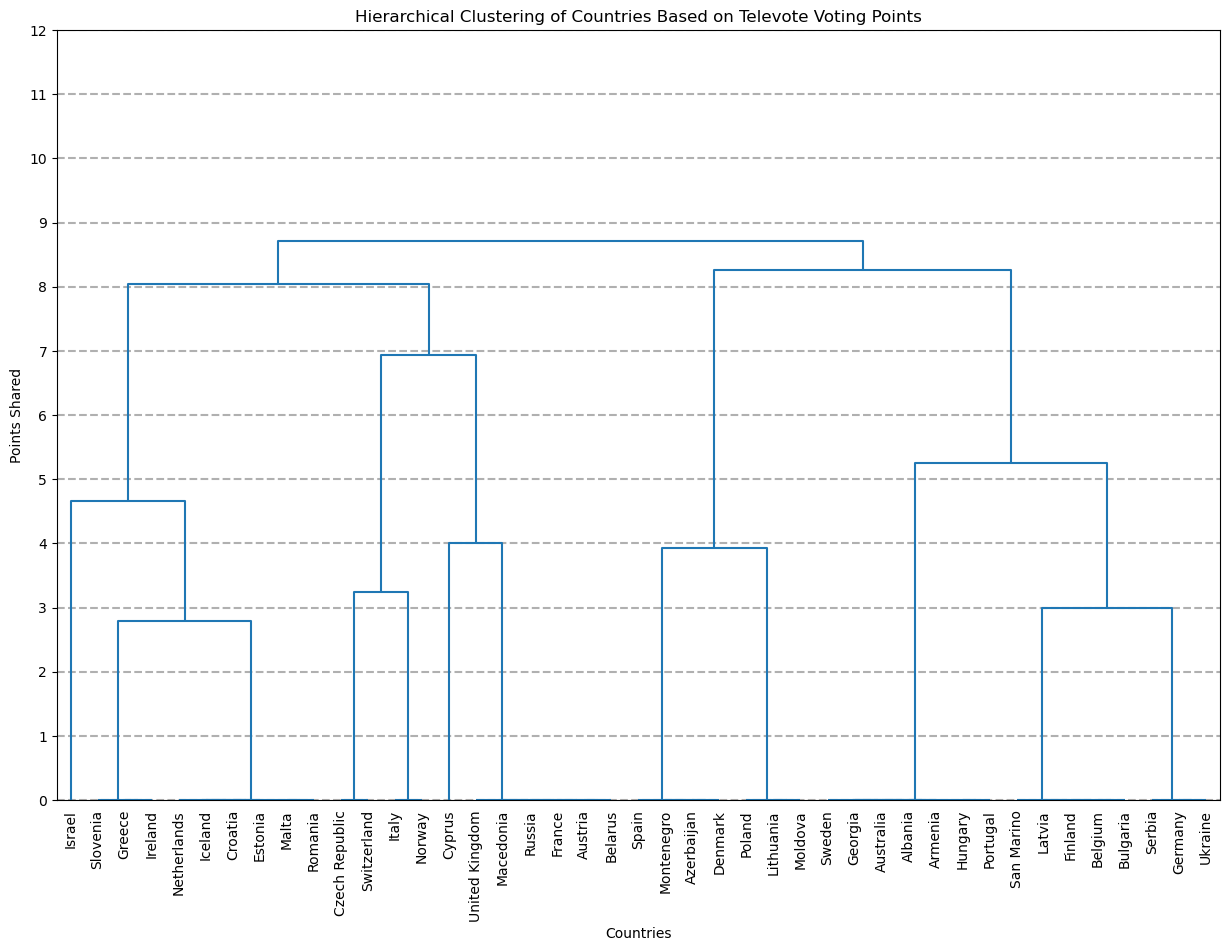

In [47]:
# Standardize country names
df4['countryfrom'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)
df4['countryto'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)

# Separate jury votes and televotes
jury_data = df4[df4['votetype'] == 'J']
televote_data = df4[df4['votetype'] == 'T']

# Extract unique countries
countries = sorted(df4['countryfrom'].unique())

# Create a dictionary to map countries to indices
country_index = {country: idx for idx, country in enumerate(countries)}

# Initialize adjacency matrices for jury and televote points
n = len(countries)
adj_matrix_jury = np.zeros((n, n))
adj_matrix_televote = np.zeros((n, n))

# Populate the jury adjacency matrix
for _, row in jury_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_jury[from_idx, to_idx] += points

# Ensure the jury adjacency matrix is symmetric
similarity_matrix_jury = (adj_matrix_jury + adj_matrix_jury.T) / 2

# Convert the similarity matrix for jury to a condensed form
condensed_similarity_matrix_jury = squareform(similarity_matrix_jury)

# Perform hierarchical clustering using the similarity matrix for jury
linked_jury = linkage(condensed_similarity_matrix_jury, method='ward')

# Plot the dendrogram for jury votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_jury,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Jury Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()

# Populate the televote adjacency matrix
for _, row in televote_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_televote[from_idx, to_idx] += points

# Ensure the televote adjacency matrix is symmetric
similarity_matrix_televote = (adj_matrix_televote + adj_matrix_televote.T) / 2

# Convert the similarity matrix for televote to a condensed form
condensed_similarity_matrix_televote = squareform(similarity_matrix_televote)

# Perform hierarchical clustering using the similarity matrix for televote
linked_televote = linkage(condensed_similarity_matrix_televote, method='ward')

# Plot the dendrogram for televote votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_televote,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Televote Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()


# Perform Geospatial Analysis 2018

In [48]:
# Calculate total points gained by each country
total_points_by_country = df4.groupby('countryto')['points'].sum()

# Calculate points given from one country to another
points_given = df4.groupby(['countryfrom', 'countryto'])['points'].sum().reset_index()


# Merge the points_given dataframe with the latLongFixed dataframe
points_given = points_given.merge(latLongFixed, left_on='countryfrom', right_on='countryfrom')

In [49]:
# List of European countries to focus on
european_countries = latLongFixed.countryfrom.tolist()

# Filter latLongFixed to include only European countries
latLongFixed_europe = latLongFixed[latLongFixed['countryfrom'].isin(european_countries)]

# Filter the total points data to include only European countries
total_points_by_country_europe = total_points_by_country[total_points_by_country.index.isin(european_countries)]

# Filter points_given to include only connections between European countries
points_given_europe = points_given[
    (points_given['countryfrom'].isin(european_countries)) &
    (points_given['countryto'].isin(european_countries))
]

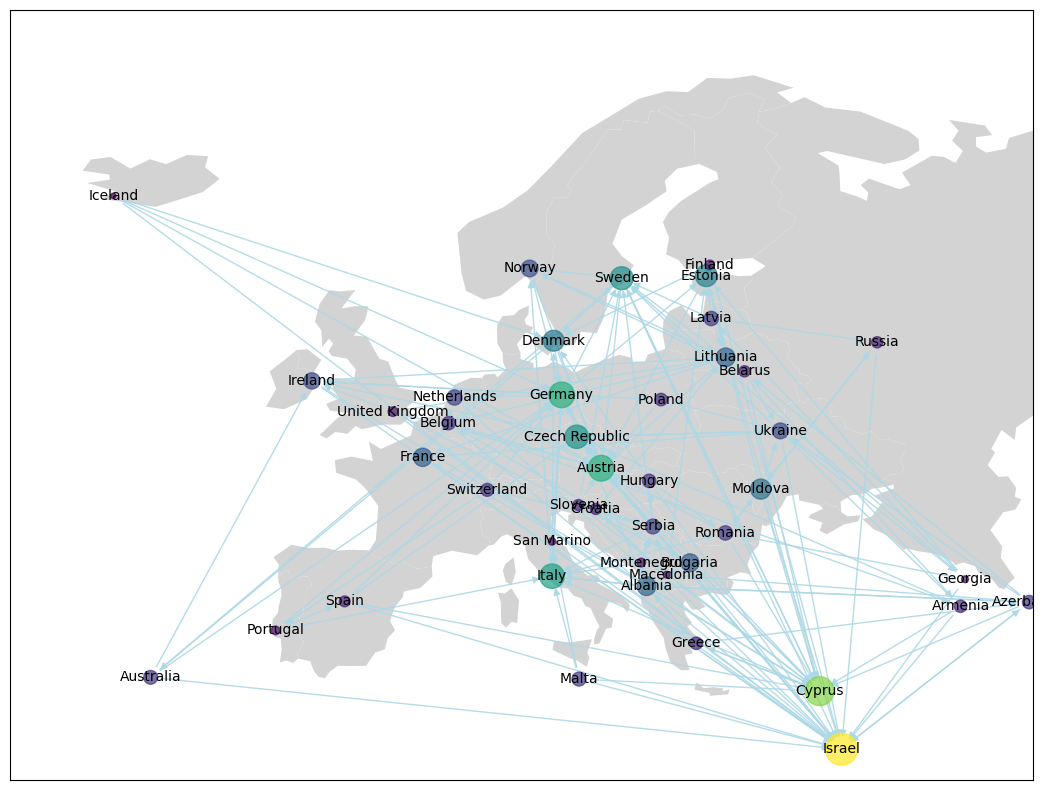

In [50]:
# Load a world map and filter for Europe
world = gpd.read_file('C:\\Users\\prajw\\Downloads\\ne_110m_admin_0_countries (1)\\ne_110m_admin_0_countries.shp')
europe = world[world['CONTINENT'] == 'Europe']

# Initialize a directed graph
G = nx.DiGraph()

# Set a default size in case points data is missing
default_size = 10

# Add nodes with total points as a node attribute, skip missing countries
for country, points in total_points_by_country_europe.items():
    if country not in latLongFixed_europe['countryfrom'].values:
        continue  # Skip countries with missing coordinates
    lat = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Latitude'].values[0]
    lon = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Longitude'].values[0]
    G.add_node(country, pos=(lon, lat), size=points if points else default_size)

# Add edges with the points given as the weight, but only if the weight is greater than 5
for _, row in points_given_europe.iterrows():
    if row['points'] >= 12 and row['countryfrom'] in G.nodes and row['countryto'] in G.nodes:
        G.add_edge(row['countryfrom'], row['countryto'], weight=row['points'])

# Extract positions and node sizes
pos = nx.get_node_attributes(G, 'pos')
sizes = [G.nodes[node].get('size', default_size) for node in G.nodes]

# Normalize the node sizes to create a color scale
norm = plt.Normalize(np.min(sizes), np.max(sizes))
node_colors = cm.viridis(norm(sizes))  # Using the 'viridis' colormap

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
europe.plot(ax=ax, color='lightgrey')

# Draw the graph with customized node colors
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightblue', alpha=0.9, arrows=True)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

# Adjust the view to focus on Europe
ax.set_xlim([-30, 50])  # Longitude range covering Europe
ax.set_ylim([30, 75])   # Latitude range covering Europe

plt.show()


# Perform Statistical Analysis 2018

Correlation between Jury and Televote Points: 0.38 (p-value: 0.0118)


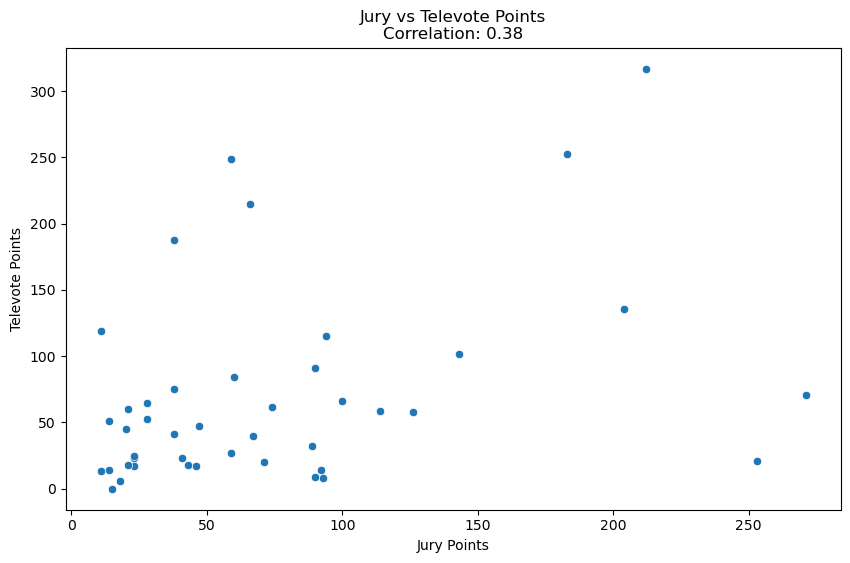

In [51]:
# Sum the points for each 'countryto'
jury_points = df_jury.groupby('countryto')['points'].sum()
televote_points = df_televote.groupby('countryto')['points'].sum()

# Combine into a single DataFrame
combined_points = pd.DataFrame({
    'Jury Points': jury_points,
    'Televote Points': televote_points
})

# Calculate the correlation
correlation, p_value = pearsonr(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Correlation between Jury and Televote Points: {correlation:.2f} (p-value: {p_value:.4f})")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jury Points', y='Televote Points', data=combined_points)
plt.title(f"Jury vs Televote Points\nCorrelation: {correlation:.2f}")
plt.xlabel('Jury Points')
plt.ylabel('Televote Points')
plt.show()


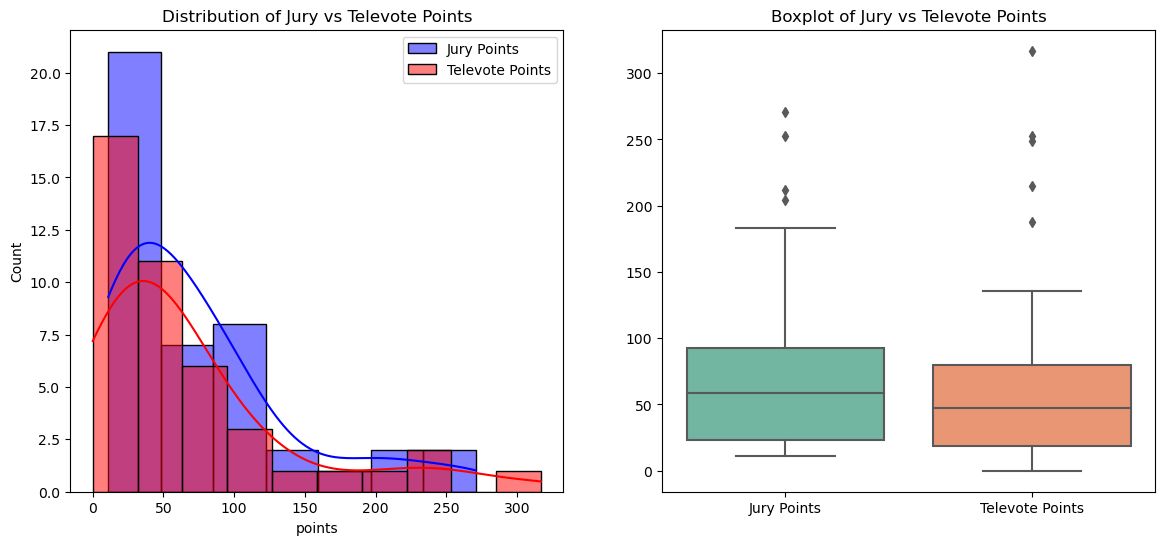

In [52]:
plt.figure(figsize=(14, 6))

# Histogram comparison
plt.subplot(1, 2, 1)
sns.histplot(jury_points, kde=True, color='blue', label='Jury Points')
sns.histplot(televote_points, kde=True, color='red', label='Televote Points')
plt.title("Distribution of Jury vs Televote Points")
plt.legend()

# Boxplot comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=[jury_points, televote_points], palette='Set2')
plt.xticks([0, 1], ['Jury Points', 'Televote Points'])
plt.title("Boxplot of Jury vs Televote Points")

plt.show()


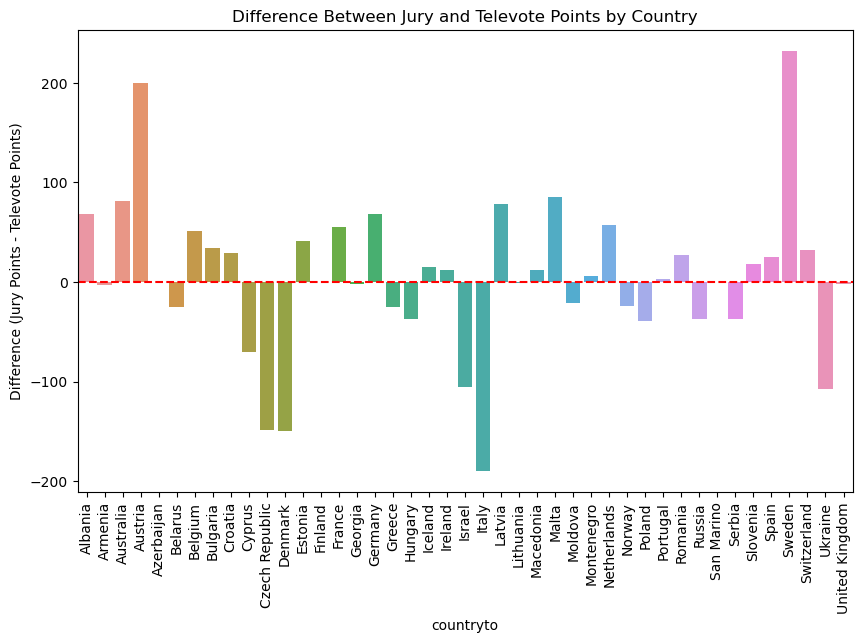

In [53]:
combined_points['Difference'] = combined_points['Jury Points'] - combined_points['Televote Points']

# Visualize the differences
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_points.index, y='Difference', data=combined_points)
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference Between Jury and Televote Points by Country')
plt.xticks(rotation=90)
plt.ylabel('Difference (Jury Points - Televote Points)')
plt.show()


In [54]:
# Paired t-test
t_stat, t_p_value = ttest_rel(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Paired t-test: t-statistic = {t_stat:.2f}, p-value = {t_p_value:.4f}")

# Wilcoxon signed-rank test
w_stat, w_p_value = wilcoxon(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Wilcoxon test: W-statistic = {w_stat:.2f}, p-value = {w_p_value:.4f}")


Paired t-test: t-statistic = 0.40, p-value = 0.6912
Wilcoxon test: W-statistic = 357.50, p-value = 0.4803


C:\Users\prajw\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [55]:
df5 = df[df['year'] == 2019]
df5 = df5.drop(columns = 'duplicate')

In [56]:
### Stantardazing countries names.
def applyRename(x):
    renamings ={
        'North Macedonia':'Macedonia',
        'F.Y.R. Macedonia':'Macedonia',
        'The Netherands': 'Netherlands',
        'The Netherlands':'Netherlands',
        'Bosnia & Herzegovina':'Bosnia',
    }
    return renamings[x] if x in renamings else x

df5['countryfrom'] = df5['countryfrom'].apply(applyRename)
df5['countryto']   = df5['countryto'].apply(applyRename)

In [57]:
#replicating  Yugoslavia's results to countries that part of it.
division = {'Yugoslavia':['Macedonia','Serbia','Montenegro','Slovenia','Bosnia','Croatia'], 'Serbia & Montenegro':['Serbia','Montenegro'] }

df5['countryfrom'] = df5['countryfrom'].apply(lambda x:division[x] if x in division else x)
df5['countryto']   = df5['countryto'].apply(lambda x:division[x] if x in division else x)
df5 = df5.explode('countryfrom').explode('countryto')

In [58]:
#keep only the points received at the highest stage (finals/semifinals)
df5['finalcode']= df5.final.map({'f':1,'sf':2,'sf1':2,'sf2':2})
temp1 = df5.groupby(['countryto','year']).agg({'finalcode':'min'});
df5 = pd.merge(df5,temp1, on=['countryto','year','finalcode'], how='inner')

assert len(df5.groupby(['countryfrom','countryto','year']).agg({'final':'nunique'}).query('final >1')) == 0

df5.drop(columns=['finalcode','edition'], inplace=True)

In [59]:
#The Winner
df5.query('final =="f"')\
    .groupby(['countryto','year']).agg({'points':'sum'}).reset_index()\
    .groupby('year').apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
    .sort_values('year',ascending=False)\
    .head(12).T.style.set_caption("The Winners")

In [60]:
# Assuming df5 is your Eurovision voting data DataFrame with columns 'year', 'countryfrom', 'countryto', 'points', 'votetype'
# Separate the data into jury and televote
df_jury = df5[df5['votetype'] == 'J']
df_televote = df5[df5['votetype'] == 'T']

# Perform Spectral clustering 2019

In [61]:
def create_adjacency_matrix(df):
    countries = np.union1d(df['countryfrom'].unique(), df['countryto'].unique())
    adj_matrix = pd.DataFrame(0, index=countries, columns=countries)
    for _, row in df.iterrows():
        adj_matrix.at[row['countryfrom'], row['countryto']] += row['points']
    return adj_matrix

# Create adjacency matrices for jury and televote
adj_matrix_jury = create_adjacency_matrix(df_jury)
adj_matrix_televote = create_adjacency_matrix(df_televote)

C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

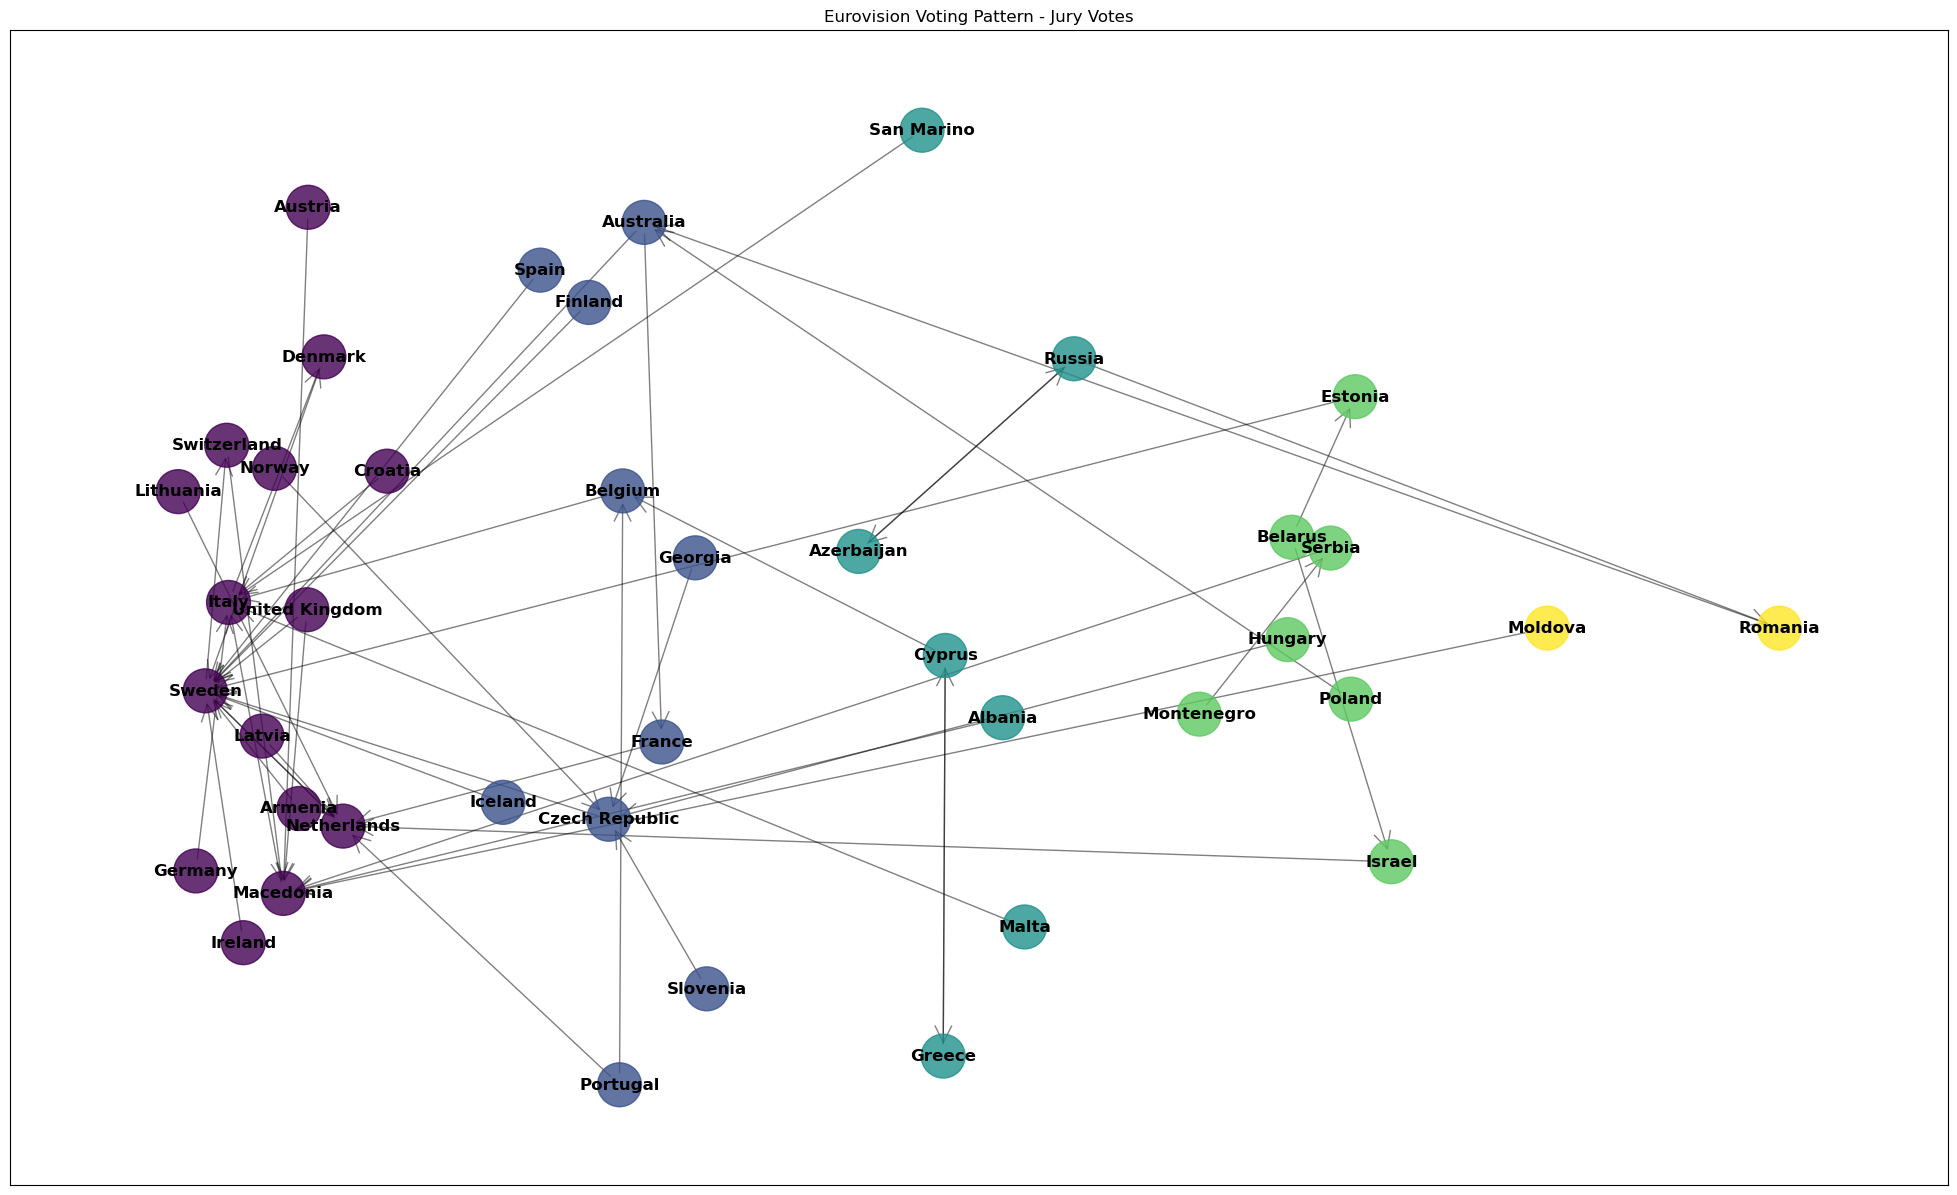

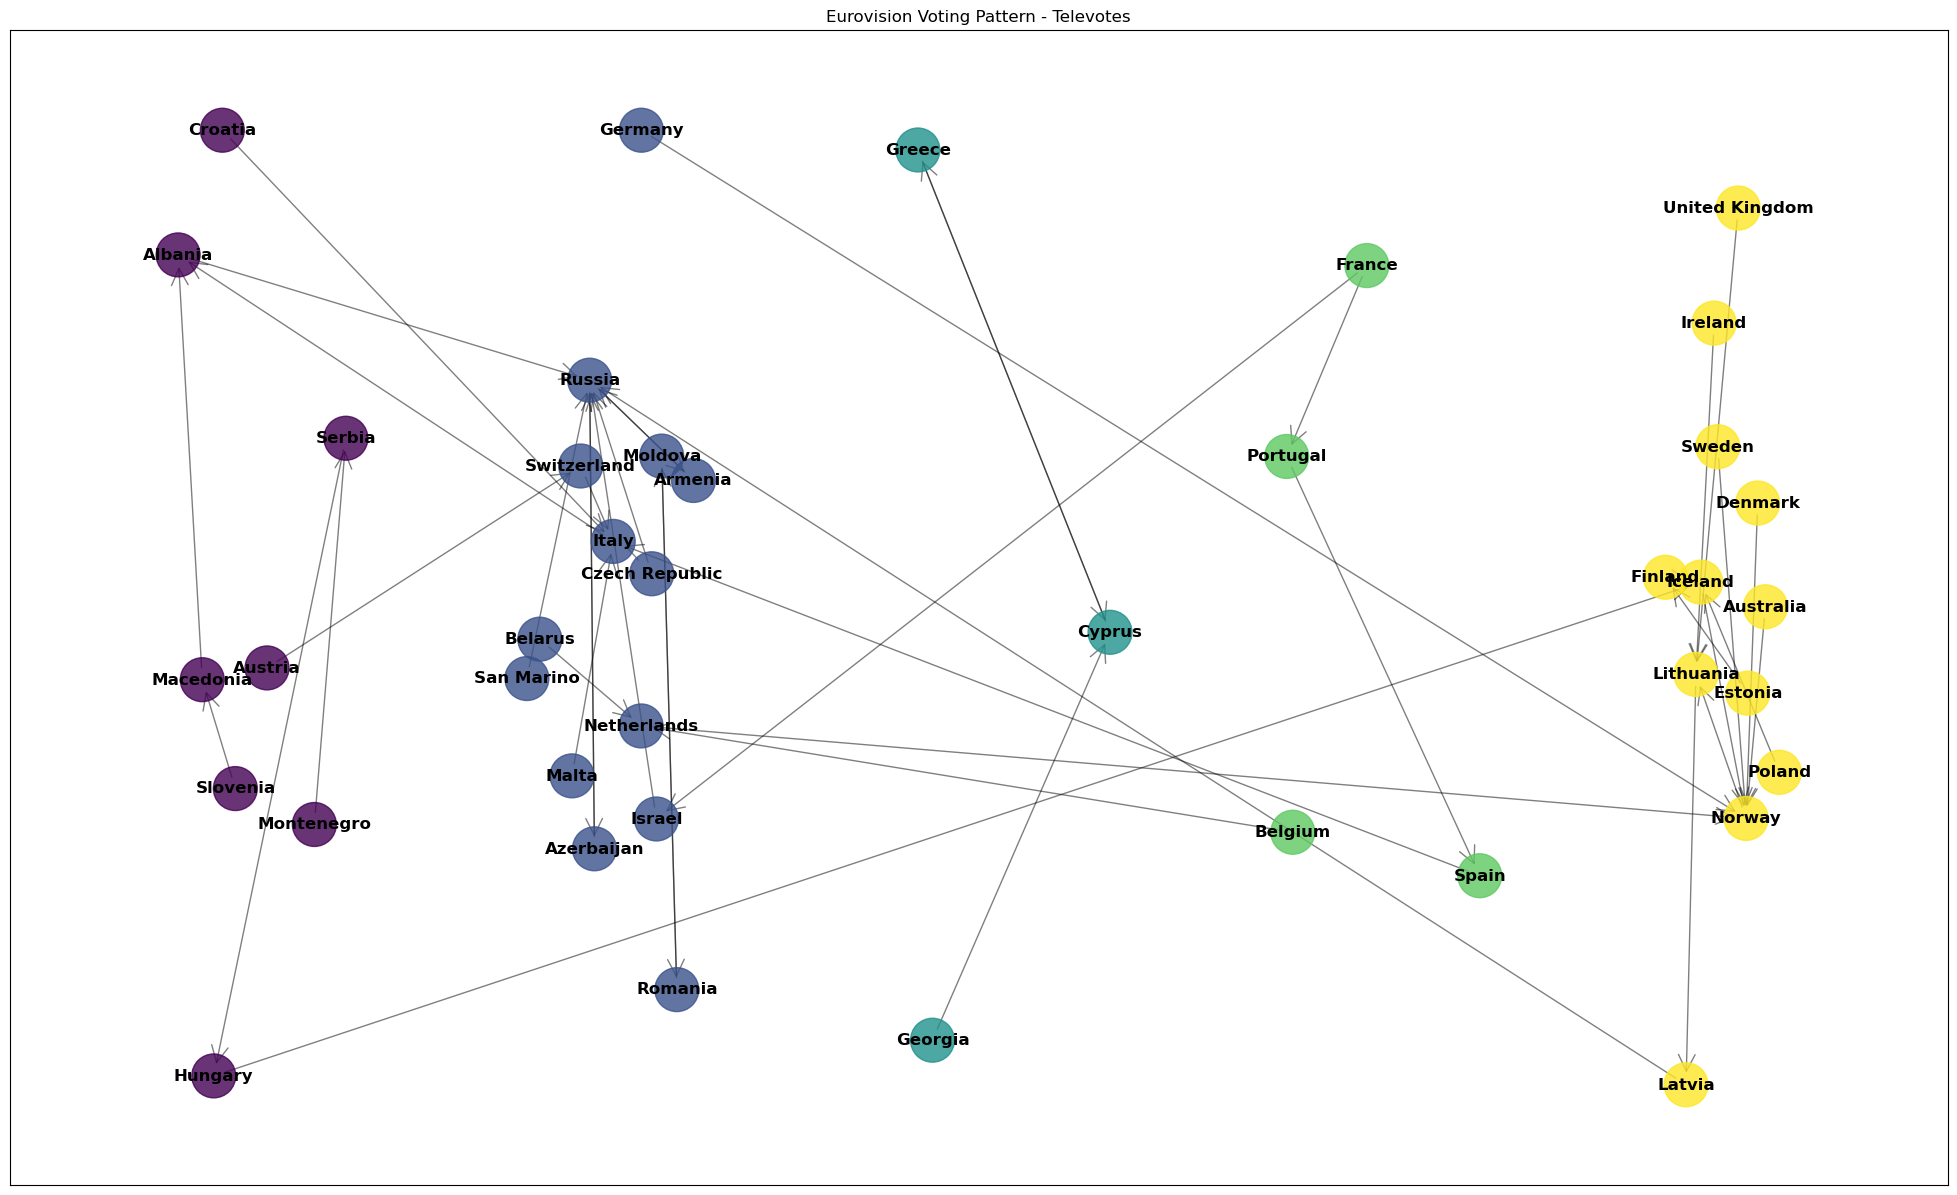

In [62]:
def perform_spectral_clustering(adj_matrix, n_clusters=5):
    sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = sc.fit_predict(adj_matrix)
    return labels

# Perform spectral clustering for jury and televote
labels_jury = perform_spectral_clustering(adj_matrix_jury)
labels_televote = perform_spectral_clustering(adj_matrix_televote)

# Function to select the top percent of edges
def selectTopPercent(df, weight_col, percent=0.3):
    df = df.sort_values(by=weight_col, ascending=False)
    cum_sum = df[weight_col].cumsum()
    total_sum = df[weight_col].sum()
    return df[cum_sum <= total_sum * percent]

# Function to plot directed graph with community labels
def plot_directed_graph(adj_matrix, labels, countries, title, edge_fraction=1.0):
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

    unique_labels = list(set(labels))
    cluster_count = len(unique_labels)
    
    # Initialize positions dictionary
    pos = {}
    for i, label in enumerate(unique_labels):
        cluster_nodes = [node for node, cluster in enumerate(labels) if cluster == label]
        cluster_pos = nx.kamada_kawai_layout(G.subgraph(cluster_nodes))
        
        # Offset positions to place clusters side by side
        offset = np.array([i * 3, 0])
        for node in cluster_nodes:
            pos[node] = cluster_pos[node] + offset

    plt.figure(figsize=(25, 15))  # larger figure size for better spacing

    # Prepare edges
    edges_df = nx.to_pandas_edgelist(G)
    edges_df['weight'] = [adj_matrix[u, v] for u, v in zip(edges_df['source'], edges_df['target'])]

    if edge_fraction < 1.0:
        edges_df = edges_df.groupby('source').apply(selectTopPercent, 'weight', edge_fraction).reset_index(drop=True)

    # Draw edges first
    edge_list = list(zip(edges_df['source'], edges_df['target']))
    nx.draw_networkx_edges(G, pos, edgelist=edge_list, arrowstyle='->', arrowsize=30, alpha=0.5)

    # Draw nodes and labels on top of edges
    nx.draw_networkx_nodes(G, pos, node_size=1000, cmap=plt.cm.viridis, node_color=labels, alpha=0.8)
    nx.draw_networkx_labels(G, pos, labels=dict(enumerate(countries)), font_size=12, font_weight='bold')

    # Title and display
    plt.title(title)
    plt.show()

# Convert adjacency matrices to numpy arrays for spectral clustering
adj_matrix_jury_np = adj_matrix_jury.values
adj_matrix_televote_np = adj_matrix_televote.values

# Plot the graphs
countries = adj_matrix_jury.index.tolist()
plot_directed_graph(adj_matrix_jury_np, labels_jury, countries, 'Eurovision Voting Pattern - Jury Votes', edge_fraction=0.3)
plot_directed_graph(adj_matrix_televote_np, labels_televote, countries, 'Eurovision Voting Pattern - Televotes', edge_fraction=0.3)


# Perform Geospatial Analysis 2019

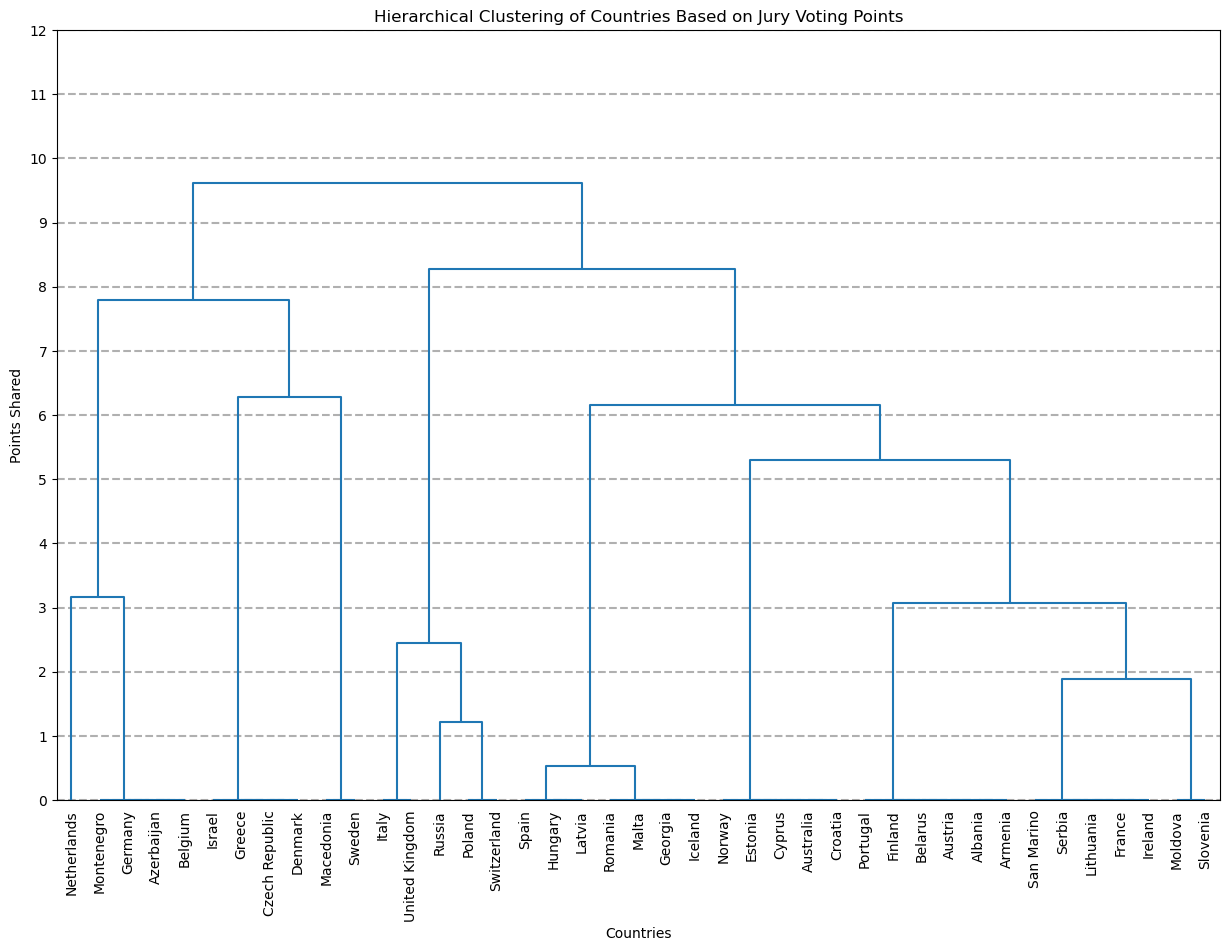

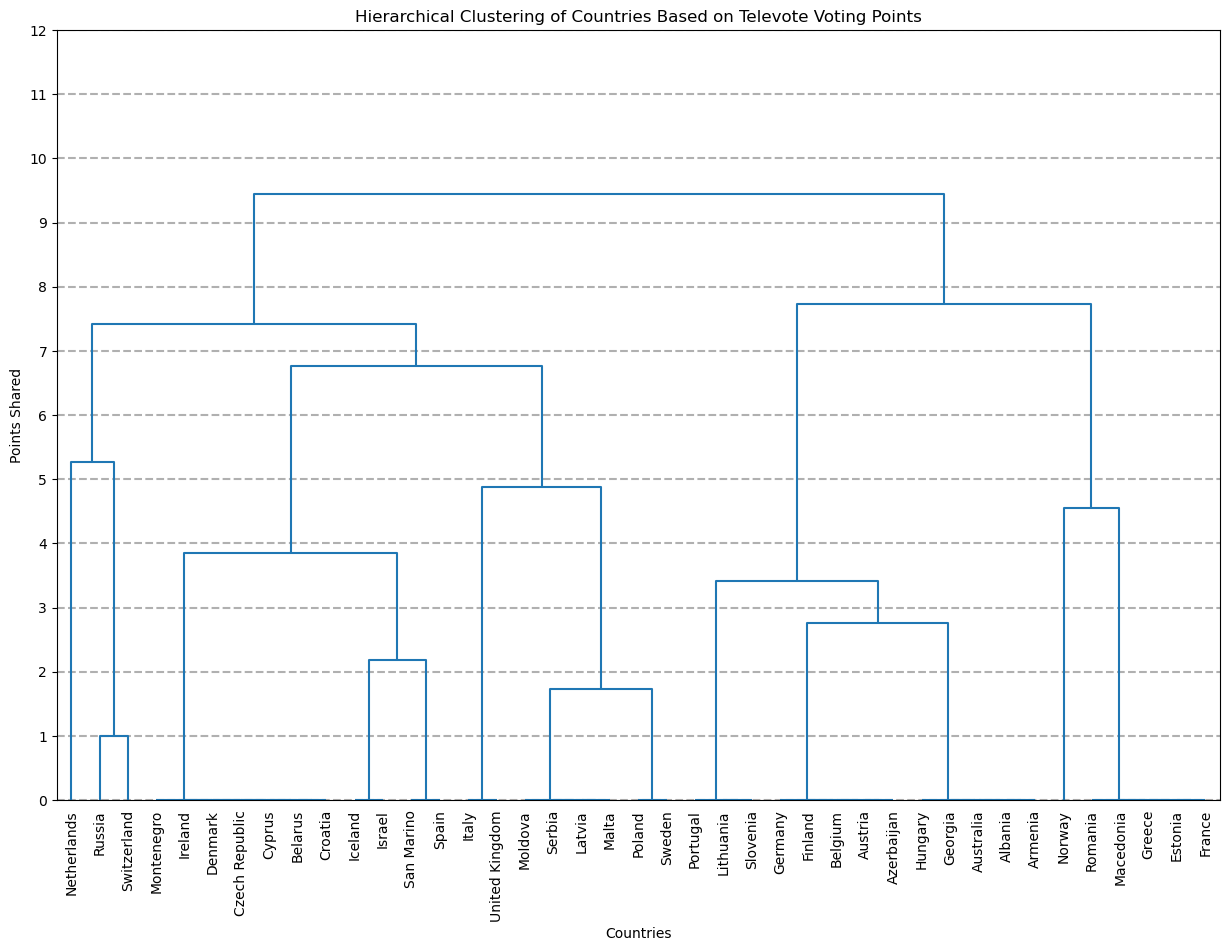

In [63]:
# Standardize country names
df5['countryfrom'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)
df5['countryto'].replace({'Bosnia': 'Bosnia and Herzegovina'}, inplace=True)

# Separate jury votes and televotes
jury_data = df5[df5['votetype'] == 'J']
televote_data = df5[df5['votetype'] == 'T']

# Extract unique countries
countries = sorted(df5['countryfrom'].unique())

# Create a dictionary to map countries to indices
country_index = {country: idx for idx, country in enumerate(countries)}

# Initialize adjacency matrices for jury and televote points
n = len(countries)
adj_matrix_jury = np.zeros((n, n))
adj_matrix_televote = np.zeros((n, n))

# Populate the jury adjacency matrix
for _, row in jury_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_jury[from_idx, to_idx] += points

# Ensure the jury adjacency matrix is symmetric
similarity_matrix_jury = (adj_matrix_jury + adj_matrix_jury.T) / 2

# Set the diagonal to zero for hierarchical clustering
np.fill_diagonal(similarity_matrix_jury, 0)

# Convert the similarity matrix for jury to a condensed form
condensed_similarity_matrix_jury = squareform(similarity_matrix_jury)

# Perform hierarchical clustering using the similarity matrix for jury
linked_jury = linkage(condensed_similarity_matrix_jury, method='ward')

# Plot the dendrogram for jury votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_jury,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Jury Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()

# Populate the televote adjacency matrix
for _, row in televote_data.iterrows():
    from_country = row['countryfrom']
    to_country = row['countryto']
    points = row['points']
    from_idx = country_index[from_country]
    to_idx = country_index[to_country]
    adj_matrix_televote[from_idx, to_idx] += points

# Ensure the televote adjacency matrix is symmetric
similarity_matrix_televote = (adj_matrix_televote + adj_matrix_televote.T) / 2

# Set the diagonal to zero for hierarchical clustering
np.fill_diagonal(similarity_matrix_televote, 0)

# Convert the similarity matrix for televote to a condensed form
condensed_similarity_matrix_televote = squareform(similarity_matrix_televote)

# Perform hierarchical clustering using the similarity matrix for televote
linked_televote = linkage(condensed_similarity_matrix_televote, method='ward')

# Plot the dendrogram for televote votes
plt.figure(figsize=(15, 10))
dendrogram(
    linked_televote,
    labels=countries,
    orientation='top',
    leaf_font_size=10,
    color_threshold=0
)

plt.title("Hierarchical Clustering of Countries Based on Televote Voting Points")
plt.xlabel("Countries")
plt.ylabel("Points Shared")
plt.yticks(np.arange(0, 13, 1))  # Set y-axis ticks from 0 to 12
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=1.5)
plt.show()


# Perform Geospatial Analysis 2019

In [64]:
# Calculate total points gained by each country
total_points_by_country = df5.groupby('countryto')['points'].sum()

# Calculate points given from one country to another
points_given = df5.groupby(['countryfrom', 'countryto'])['points'].sum().reset_index()


# Merge the points_given dataframe with the latLongFixed dataframe
points_given = points_given.merge(latLongFixed, left_on='countryfrom', right_on='countryfrom')

In [65]:
# List of European countries to focus on
european_countries = latLongFixed.countryfrom.tolist()

# Filter latLongFixed to include only European countries
latLongFixed_europe = latLongFixed[latLongFixed['countryfrom'].isin(european_countries)]

# Filter the total points data to include only European countries
total_points_by_country_europe = total_points_by_country[total_points_by_country.index.isin(european_countries)]

# Filter points_given to include only connections between European countries
points_given_europe = points_given[
    (points_given['countryfrom'].isin(european_countries)) &
    (points_given['countryto'].isin(european_countries))
]

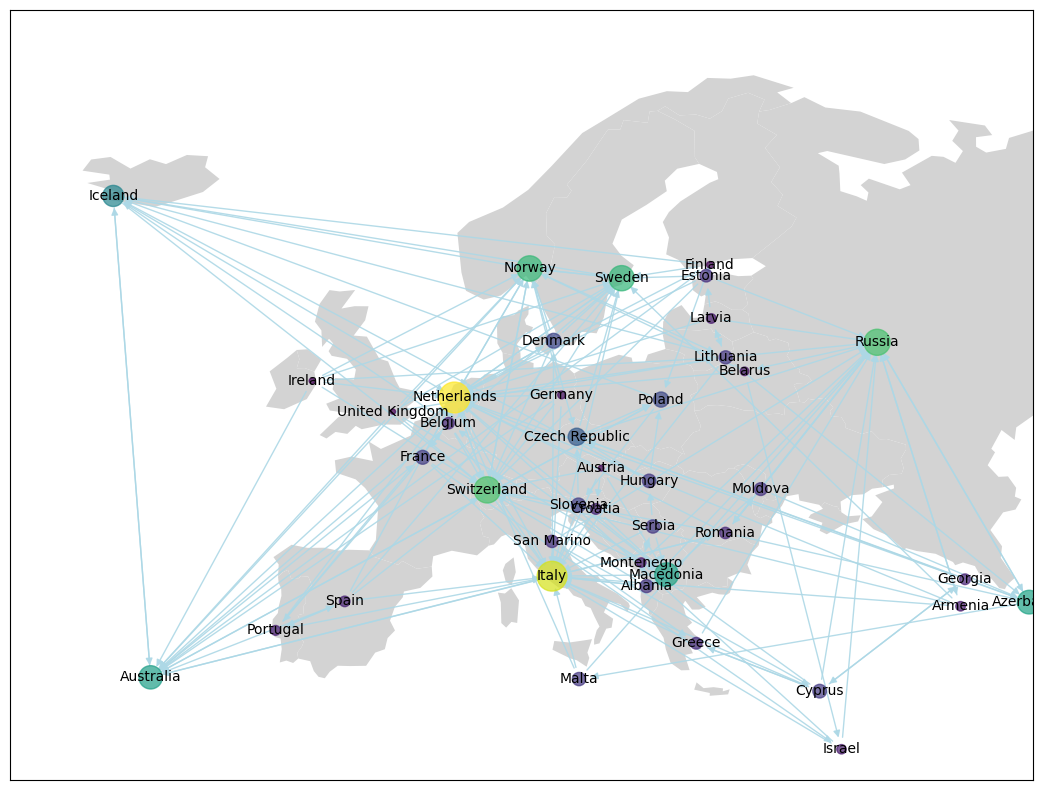

In [66]:
# Load a world map and filter for Europe
world = gpd.read_file('C:\\Users\\prajw\\Downloads\\ne_110m_admin_0_countries (1)\\ne_110m_admin_0_countries.shp')
europe = world[world['CONTINENT'] == 'Europe']

# Initialize a directed graph
G = nx.DiGraph()

# Set a default size in case points data is missing
default_size = 10

# Add nodes with total points as a node attribute, skip missing countries
for country, points in total_points_by_country_europe.items():
    if country not in latLongFixed_europe['countryfrom'].values:
        continue  # Skip countries with missing coordinates
    lat = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Latitude'].values[0]
    lon = latLongFixed_europe[latLongFixed_europe['countryfrom'] == country]['Longitude'].values[0]
    G.add_node(country, pos=(lon, lat), size=points if points else default_size)

# Add edges with the points given as the weight, but only if the weight is greater than 5
for _, row in points_given_europe.iterrows():
    if row['points'] >= 12 and row['countryfrom'] in G.nodes and row['countryto'] in G.nodes:
        G.add_edge(row['countryfrom'], row['countryto'], weight=row['points'])

# Extract positions and node sizes
pos = nx.get_node_attributes(G, 'pos')
sizes = [G.nodes[node].get('size', default_size) for node in G.nodes]

# Normalize the node sizes to create a color scale
norm = plt.Normalize(np.min(sizes), np.max(sizes))
node_colors = cm.viridis(norm(sizes))  # Using the 'viridis' colormap

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
europe.plot(ax=ax, color='lightgrey')

# Draw the graph with customized node colors
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightblue', alpha=0.9, arrows=True)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10)

# Adjust the view to focus on Europe
ax.set_xlim([-30, 50])  # Longitude range covering Europe
ax.set_ylim([30, 75])   # Latitude range covering Europe

plt.show()


# Perform Statistical Analysis 2019

Correlation between Jury and Televote Points: 0.53 (p-value: 0.0003)


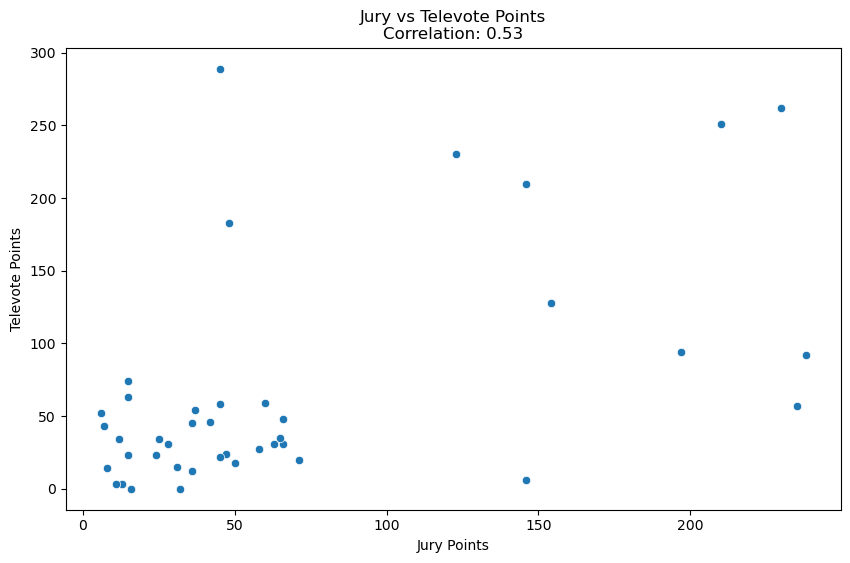

In [67]:
# Assume df_jury and df_televote are already separated

# Sum the points for each 'countryto'
jury_points = df_jury.groupby('countryto')['points'].sum()
televote_points = df_televote.groupby('countryto')['points'].sum()

# Combine into a single DataFrame
combined_points = pd.DataFrame({
    'Jury Points': jury_points,
    'Televote Points': televote_points
})

# Calculate the correlation
correlation, p_value = pearsonr(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Correlation between Jury and Televote Points: {correlation:.2f} (p-value: {p_value:.4f})")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jury Points', y='Televote Points', data=combined_points)
plt.title(f"Jury vs Televote Points\nCorrelation: {correlation:.2f}")
plt.xlabel('Jury Points')
plt.ylabel('Televote Points')
plt.show()


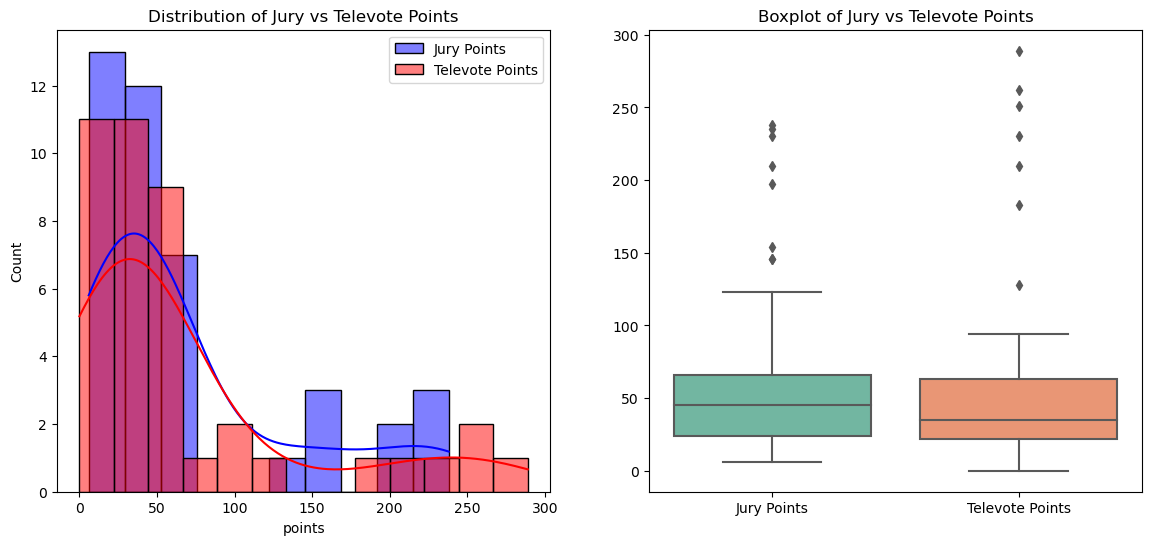

In [68]:
plt.figure(figsize=(14, 6))

# Histogram comparison
plt.subplot(1, 2, 1)
sns.histplot(jury_points, kde=True, color='blue', label='Jury Points')
sns.histplot(televote_points, kde=True, color='red', label='Televote Points')
plt.title("Distribution of Jury vs Televote Points")
plt.legend()

# Boxplot comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=[jury_points, televote_points], palette='Set2')
plt.xticks([0, 1], ['Jury Points', 'Televote Points'])
plt.title("Boxplot of Jury vs Televote Points")

plt.show()


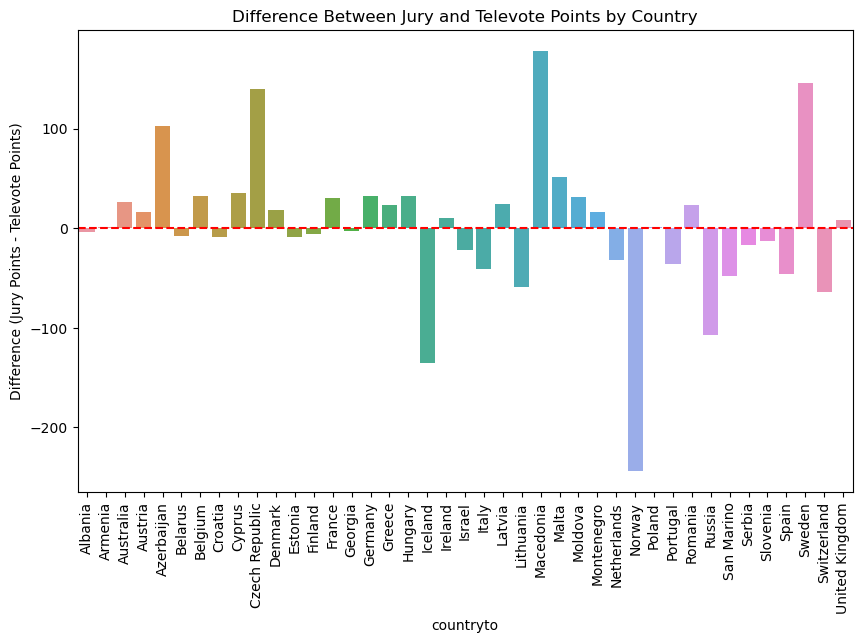

In [69]:
combined_points['Difference'] = combined_points['Jury Points'] - combined_points['Televote Points']

# Visualize the differences
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_points.index, y='Difference', data=combined_points)
plt.axhline(0, color='red', linestyle='--')
plt.title('Difference Between Jury and Televote Points by Country')
plt.xticks(rotation=90)
plt.ylabel('Difference (Jury Points - Televote Points)')
plt.show()


In [70]:
from scipy.stats import ttest_rel, wilcoxon

# Paired t-test
t_stat, t_p_value = ttest_rel(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Paired t-test: t-statistic = {t_stat:.2f}, p-value = {t_p_value:.4f}")

# Wilcoxon signed-rank test
w_stat, w_p_value = wilcoxon(combined_points['Jury Points'], combined_points['Televote Points'])
print(f"Wilcoxon test: W-statistic = {w_stat:.2f}, p-value = {w_p_value:.4f}")


Paired t-test: t-statistic = 0.16, p-value = 0.8732
Wilcoxon test: W-statistic = 400.00, p-value = 0.7004
